## Importing modules and defining functions

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet

# Preprocessing data

In the previous chapter, the data was nice and tidy fromt he start, and ready to plug and play with scikit lean. In real life, this will rarely be the case. e.g. male/female or diabetes/no diabetes categories need to be in numerical 1/0 form for scikit learn to accept them. We split these features into binary 'dummy variables'.

We must remember to have 1 less dummy variable than there are categories, otherwise we fall into the dummy variable trap. e.g. if we have three categories of car, European, American and Asian, we have two dummy variables, Asian and American, and 0 on both implies European. 

To create dummies, we can use scikitlearn's OneHotEncoder() or Pandas get_dummies()

* [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html), [tutorial](http://fastml.com/how-to-use-pd-dot-get-dummies-with-the-test-set/)
* [OneHotEncoder()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [106]:
import pandas as pd

df = pd.read_csv('auto.csv')
df_origin = pd.get_dummies(df)
print(df_origin.head())

    mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0  


In [107]:
# Because of the dummy variable trap rule, we can drop one column. Here we drop the Asian column
df_origin = df_origin.drop('origin_Asia', axis=1)
print(df_origin.head())

    mpg  displ   hp  weight  accel  size  origin_Europe  origin_US
0  18.0  250.0   88    3139   14.5  15.0              0          1
1   9.0  304.0  193    4732   18.5  20.0              0          1
2  36.1   91.0   60    1800   16.4  10.0              0          0
3  18.5  250.0   98    3525   19.0  15.0              0          1
4  34.3   97.0   78    2188   15.8  10.0              1          0


## Exploring categorical features

The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!

Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

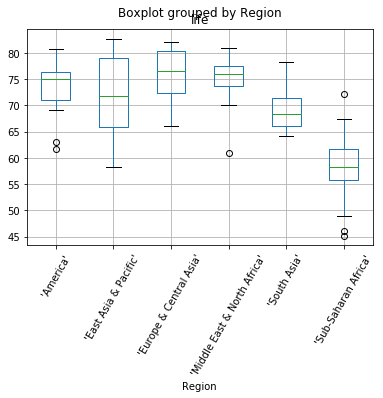

In [108]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder_2.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

Great work! Exploratory data analysis should always be the precursor to model building.

## Creating dummy variables

As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

In [109]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)
print()
# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['Unnamed: 0', 'BMI_female', 'BMI_male', 'CO2', 'GDP', 'HIV',
       'child_mortality', 'fertility', 'life', 'population',
       'Region_'America'', 'Region_'East Asia & Pacific'',
       'Region_'Europe & Central Asia'', 'Region_'Middle East & North Africa'',
       'Region_'South Asia'', 'Region_'Sub-Saharan Africa''],
      dtype='object')

Index(['Unnamed: 0', 'BMI_female', 'BMI_male', 'CO2', 'GDP', 'HIV',
       'child_mortality', 'fertility', 'life', 'population',
       'Region_'East Asia & Pacific'', 'Region_'Europe & Central Asia'',
       'Region_'Middle East & North Africa'', 'Region_'South Asia'',
       'Region_'Sub-Saharan Africa''],
      dtype='object')


Excellent! Now that you have created the dummy variables, you can use the 'Region' feature to predict life expectancy!

## Regression with categorical features

Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

The feature array X and target variable array y have been pre-loaded.

In [110]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv('ch4_categ.csv')
X = df.drop('target', axis=1).values
y = df.target

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[ 0.85346079  0.8018539   0.83954719  0.77530847  0.87473417]


Excellent! You now know how to build models using data that includes categorical features.

# Handling missing data

In the real world, an observation might be missing. There may ahve not actually been data for this observation, or they may have been a transcription error, or data may have bene corrupted. It is not always enough to check using df.info, as missing data may be encoded as a value, such as a question mark or a -1

In [111]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Insulin values of 0 do not make sense, and nor does the 0 value in the triceps column. Let's replace these missing values with nan

* [df.replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)

In [113]:
import numpy as np

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


We have a few ways of dealing with missing data:

* Drop all rows that have missing data - use dropna() for this. But this loses LOTS of data. If only a few rows have missing data, this isn't so bad, but otherwise it costs too much data
* Impute missing data - make educated guess as to what the values could be - interpolation. FOr example, using the mean for all the missing values. Below this is done using Imputer with axis = 0 to mean rows and using strategy=mean. We then fit that to the data and transform the data accordingly


* [sklearn.Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)
* [tutorial](https://machinelearningmastery.com/handle-missing-data-python/)

In [114]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)

The imputer is a transformer. Any model that can transform data in this way is known as a transformer. Having done this, we could fit the supervised learning model to it. But there is a way to do both at once by using a pipeline object. In a pipeline, each step but the last _must_ be a transformer and the last must be an estimator, such as a classifer, regressor or transformer.

## Dropping missing data

The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now, it's time for you to take care of these yourself!

The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

In [115]:
# Load the dataset
df = pd.read_csv('voting.csv', index_col=0)
df.head()

,aid,budget,crime,duty_free_exports,eaa_rsa,education,immigration,infants,missile,party,physician,religious,salvador,satellite,superfund,synfuels,water
0,0,0,1,0,1,1,1,0,0,'republican',1,1,1,0,1,?,1
1,0,0,1,0,?,1,0,0,0,'republican',1,1,1,0,1,0,1
2,0,1,1,0,0,0,0,?,0,'democrat',?,1,1,0,1,1,1
3,0,1,0,0,1,0,0,0,0,'democrat',0,1,?,0,1,1,1
4,0,1,1,1,1,?,0,1,0,'democrat',0,1,1,0,1,1,1


In [116]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print('Nulls following conversion')
print(df.isnull().sum())
print()

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

Nulls following conversion
aid                   15
budget                11
crime                 17
duty_free_exports     28
eaa_rsa              104
education             31
immigration            7
infants               12
missile               22
party                  0
physician             11
religious             11
salvador              15
satellite             14
superfund             25
synfuels              21
water                 48
dtype: int64

Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


Great work! When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

## Imputing missing data in a ML Pipeline I

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.

* [sklearn.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [117]:
# Import Imputer from sklearn.preprocessing and SVC from sklearn.svm. 
# SVC stands for Support Vector Classification, which is a type of SVM.
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer to impute missing data 
# (represented as 'NaN') with the 'most_frequent' value in the column (axis=0).
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

Fantastic! Having set up the pipeline steps, you can now use it for classification.

## Imputing missing data in a ML Pipeline II

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array X and target variable array y have been pre-loaded. Additionally, train_test_split and classification_report have been imported from sklearn.model_selection and sklearn.metrics respectively. 

As a quick refresher, the dataframe is loaded here to show the presence of missing values and the feature and target variabels extracted from this dataset.

In [118]:
# Load the dataset
df = pd.read_csv('voting.csv', index_col=0)
df[df == '?'] = np.nan
X = df.drop('party', axis=1)
y = df.party
df.head()

,aid,budget,crime,duty_free_exports,eaa_rsa,education,immigration,infants,missile,party,physician,religious,salvador,satellite,superfund,synfuels,water
0,0,0,1,0,1,1,1,0,0,'republican',1,1,1,0,1,NaN,1
1,0,0,1,0,NaN,1,0,0,0,'republican',1,1,1,0,1,0,1
2,0,1,1,0,0,0,0,NaN,0,'democrat',NaN,1,1,0,1,1,1
3,0,1,0,0,1,0,0,0,0,'democrat',0,1,NaN,0,1,1,1
4,0,1,1,1,1,NaN,0,1,0,'democrat',0,1,1,0,1,1,1


In [119]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  'democrat'       0.99      0.96      0.98        85
'republican'       0.94      0.98      0.96        46

 avg / total       0.97      0.97      0.97       131



Great work! Your pipeline has performed imputation as well as classification!

# Centering and scaling

Data imputation is an important part of pre-processing. Centering and scaling data is another. k-NN uses distance explicitly when making predictions, and this is influenced by the size of variables. Features with larger scales can therefore unduly influence the model  (eg. GDP which is measured in billions used in a model that also has average family size which is measured between 2-6, perhaps). 

* The normal standardization approach, as used to create the standard normal distribution, would be to subtract  the mean from each observation and divide by the variance, so all variables are centered around zero and have variance 1. 

* Subtract the minimum and divide by the range - min 0 and max 1

* Normalize so data ranges from -1 to 1

## Centering and scaling your data

In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - [White Wine Quality!](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) Hugo used the Red Wine Quality dataset in the video. We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

Explore the dataframe. Notice how some features seem to have different units of measurement. 'density', for instance, only takes values between 0 and 1, while 'total sulfur dioxide' has a maximum value of 289. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

* [sklearn.scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)

In [131]:
# Import pandas and load the dataset
import pandas as pd

# Load the dataframe and define the independent and dependent variables
df = pd.read_csv('white_wine_fixed.csv')
X = df.drop('target', axis=1)
y = df.target
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [132]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


The wine quality dataset is here stored as a numpy array to better show the effects of scaling. Were it still stored as a dataframe, the means and standard deviations would show for each variable/feature as in the describe method above whereas what is actually needed is a single mean and std figure

In [134]:
X = np.array([[7, 0.27, 0.36, 20.7, 0.045, 45, 170, 1.001, 3, 0.45, 8.8], [6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5], [8.1, 0.28, 0.4, 6.9, 0.05, 30, 97, 0.995, 3.26, 0.44, 10.1], [7.2, 0.23, 0.32, 8.5, 0.058, 47, 186, 0.996, 3.19, 0.4, 9.9], [7.2, 0.23, 0.32, 8.5, 0.058, 47, 186, 0.996, 3.19, 0.4, 9.9], [8.1, 0.28, 0.4, 6.9, 0.05, 30, 97, 0.995, 3.26, 0.44, 10.1], [6.2, 0.32, 0.16, 7, 0.045, 30, 136, 0.995, 3.18, 0.47, 9.6], [7, 0.27, 0.36, 20.7, 0.045, 45, 170, 1.001, 3, 0.45, 8.8], [6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5], [8.1, 0.22, 0.43, 1.5, 0.044, 28, 129, 0.994, 3.22, 0.45, 11], [8.1, 0.27, 0.41, 1.45, 0.033, 11, 63, 0.991, 2.99, 0.56, 12], [8.6, 0.23, 0.4, 4.2, 0.035, 17, 109, 0.995, 3.14, 0.53, 9.7], [7.9, 0.18, 0.37, 1.2, 0.04, 16, 75, 0.992, 3.18, 0.63, 10.8], [6.6, 0.16, 0.4, 1.5, 0.044, 48, 143, 0.991, 3.54, 0.52, 12.4], [8.3, 0.42, 0.62, 19.25, 0.04, 41, 172, 1, 2.98, 0.67, 9.7], [6.6, 0.17, 0.38, 1.5, 0.032, 28, 112, 0.991, 3.25, 0.55, 11.4], [6.3, 0.48, 0.04, 1.1, 0.046, 30, 99, 0.993, 3.24, 0.36, 9.6], [6.2, 0.66, 0.48, 1.2, 0.029, 29, 75, 0.989, 3.33, 0.39, 12.8], [7.4, 0.34, 0.42, 1.1, 0.033, 17, 171, 0.992, 3.12, 0.53, 11.3], [6.5, 0.31, 0.14, 7.5, 0.044, 34, 133, 0.996, 3.22, 0.5, 9.5], [6.2, 0.66, 0.48, 1.2, 0.029, 29, 75, 0.989, 3.33, 0.39, 12.8], [6.4, 0.31, 0.38, 2.9, 0.038, 19, 102, 0.991, 3.17, 0.35, 11], [6.8, 0.26, 0.42, 1.7, 0.049, 41, 122, 0.993, 3.47, 0.48, 10.5], [7.6, 0.67, 0.14, 1.5, 0.074, 25, 168, 0.994, 3.05, 0.51, 9.3], [6.6, 0.27, 0.41, 1.3, 0.052, 16, 142, 0.995, 3.42, 0.47, 10], [7, 0.25, 0.32, 9, 0.046, 56, 245, 0.996, 3.25, 0.5, 10.4], [6.9, 0.24, 0.35, 1, 0.052, 35, 146, 0.993, 3.45, 0.44, 10], [7, 0.28, 0.39, 8.7, 0.051, 32, 141, 0.996, 3.38, 0.53, 10.5], [7.4, 0.27, 0.48, 1.1, 0.047, 17, 132, 0.991, 3.19, 0.49, 11.6], [7.2, 0.32, 0.36, 2, 0.033, 37, 114, 0.991, 3.1, 0.71, 12.3], [8.5, 0.24, 0.39, 10.4, 0.044, 20, 142, 0.997, 3.2, 0.53, 10], [8.3, 0.14, 0.34, 1.1, 0.042, 7, 47, 0.993, 3.47, 0.4, 10.2], [7.4, 0.25, 0.36, 2.05, 0.05, 31, 100, 0.992, 3.19, 0.44, 10.8], [6.2, 0.12, 0.34, 1.5, 0.045, 43, 117, 0.994, 3.42, 0.51, 9], [5.8, 0.27, 0.2, 14.95, 0.044, 22, 179, 0.996, 3.37, 0.37, 10.2], [7.3, 0.28, 0.43, 1.7, 0.08, 21, 123, 0.991, 3.19, 0.42, 12.8], [6.5, 0.39, 0.23, 5.4, 0.051, 25, 149, 0.993, 3.24, 0.35, 10], [7, 0.33, 0.32, 1.2, 0.053, 38, 138, 0.991, 3.13, 0.28, 11.2], [7.3, 0.24, 0.39, 17.95, 0.057, 45, 149, 1, 3.21, 0.36, 8.6], [7.3, 0.24, 0.39, 17.95, 0.057, 45, 149, 1, 3.21, 0.36, 8.6], [6.7, 0.23, 0.39, 2.5, 0.172, 63, 158, 0.994, 3.11, 0.36, 9.4], [6.7, 0.24, 0.39, 2.9, 0.173, 63, 157, 0.994, 3.1, 0.34, 9.4], [7, 0.31, 0.26, 7.4, 0.069, 28, 160, 0.995, 3.13, 0.46, 9.8], [6.6, 0.24, 0.27, 1.4, 0.057, 33, 152, 0.993, 3.22, 0.56, 9.5], [6.7, 0.23, 0.26, 1.4, 0.06, 33, 154, 0.993, 3.24, 0.56, 9.5], [7.4, 0.18, 0.31, 1.4, 0.058, 38, 167, 0.993, 3.16, 0.53, 10], [6.2, 0.45, 0.26, 4.4, 0.063, 63, 206, 0.994, 3.27, 0.52, 9.8], [6.2, 0.46, 0.25, 4.4, 0.066, 62, 207, 0.994, 3.25, 0.52, 9.8], [7, 0.31, 0.26, 7.4, 0.069, 28, 160, 0.995, 3.13, 0.46, 9.8], [6.9, 0.19, 0.35, 5, 0.067, 32, 150, 0.995, 3.36, 0.48, 9.8], [7.2, 0.19, 0.31, 1.6, 0.062, 31, 173, 0.992, 3.35, 0.44, 11.7], [6.6, 0.25, 0.29, 1.1, 0.068, 39, 124, 0.991, 3.34, 0.58, 11], [6.2, 0.16, 0.33, 1.1, 0.057, 21, 82, 0.991, 3.32, 0.46, 10.9], [6.4, 0.18, 0.35, 1, 0.045, 39, 108, 0.991, 3.31, 0.35, 10.9], [6.8, 0.2, 0.59, 0.9, 0.147, 38, 132, 0.993, 3.05, 0.38, 9.1], [6.9, 0.25, 0.35, 1.3, 0.039, 29, 191, 0.991, 3.13, 0.52, 11], [7.2, 0.21, 0.34, 11.9, 0.043, 37, 213, 0.996, 3.09, 0.5, 9.6], [6, 0.19, 0.26, 12.4, 0.048, 50, 147, 0.997, 3.3, 0.36, 8.9], [6.6, 0.38, 0.15, 4.6, 0.044, 25, 78, 0.993, 3.11, 0.38, 10.2], [7.4, 0.2, 0.36, 1.2, 0.038, 44, 111, 0.993, 3.36, 0.34, 9.9], [6.8, 0.22, 0.24, 4.9, 0.092, 30, 123, 0.995, 3.03, 0.46, 8.6], [6, 0.19, 0.26, 12.4, 0.048, 50, 147, 0.997, 3.3, 0.36, 8.9], [7, 0.47, 0.07, 1.1, 0.035, 17, 151, 0.991, 3.02, 0.34, 10.5], [6.6, 0.38, 0.15, 4.6, 0.044, 25, 78, 0.993, 3.11, 0.38, 10.2], [7.2, 0.24, 0.27, 1.4, 0.038, 31, 122, 0.993, 3.15, 0.46, 10.3], [6.2, 0.35, 0.03, 1.2, 0.064, 29, 120, 0.993, 3.22, 0.54, 9.1], [6.4, 0.26, 0.24, 6.4, 0.04, 27, 124, 0.99, 3.22, 0.49, 12.6], [6.7, 0.25, 0.13, 1.2, 0.041, 81, 174, 0.992, 3.14, 0.42, 9.8], [6.7, 0.23, 0.31, 2.1, 0.046, 30, 96, 0.993, 3.33, 0.64, 10.7], [7.4, 0.24, 0.29, 10.1, 0.05, 21, 105, 0.996, 3.13, 0.35, 9.5], [6.2, 0.27, 0.43, 7.8, 0.056, 48, 244, 0.996, 3.1, 0.51, 9], [6.8, 0.3, 0.23, 4.6, 0.061, 50.5, 238.5, 0.996, 3.32, 0.6, 9.5], [6, 0.27, 0.28, 4.8, 0.063, 31, 201, 0.996, 3.69, 0.71, 10], [8.6, 0.23, 0.46, 1, 0.054, 9, 72, 0.994, 2.95, 0.49, 9.1], [6.7, 0.23, 0.31, 2.1, 0.046, 30, 96, 0.993, 3.33, 0.64, 10.7], [7.4, 0.24, 0.29, 10.1, 0.05, 21, 105, 0.996, 3.13, 0.35, 9.5], [7.1, 0.18, 0.36, 1.4, 0.043, 31, 87, 0.99, 3.26, 0.37, 12.7], [7, 0.32, 0.34, 1.3, 0.042, 20, 69, 0.991, 3.31, 0.65, 12], [7.4, 0.18, 0.3, 8.8, 0.064, 26, 103, 0.996, 2.94, 0.56, 9.3], [6.7, 0.54, 0.28, 5.4, 0.06, 21, 105, 0.995, 3.27, 0.37, 9], [6.8, 0.22, 0.31, 1.4, 0.053, 34, 114, 0.993, 3.39, 0.77, 10.6], [7.1, 0.2, 0.34, 16, 0.05, 51, 166, 0.999, 3.21, 0.6, 9.2], [7.1, 0.34, 0.2, 6.1, 0.063, 47, 164, 0.995, 3.17, 0.42, 10], [7.3, 0.22, 0.3, 8.2, 0.047, 42, 207, 0.997, 3.33, 0.46, 9.5], [7.1, 0.43, 0.61, 11.8, 0.045, 54, 155, 0.997, 3.11, 0.45, 8.7], [7.1, 0.44, 0.62, 11.8, 0.044, 52, 152, 0.998, 3.12, 0.46, 8.7], [7.2, 0.39, 0.63, 11, 0.044, 55, 156, 0.997, 3.09, 0.44, 8.7], [6.8, 0.25, 0.31, 13.3, 0.05, 69, 202, 0.997, 3.22, 0.48, 9.7], [7.1, 0.43, 0.61, 11.8, 0.045, 54, 155, 0.997, 3.11, 0.45, 8.7], [7.1, 0.44, 0.62, 11.8, 0.044, 52, 152, 0.998, 3.12, 0.46, 8.7], [7.2, 0.39, 0.63, 11, 0.044, 55, 156, 0.997, 3.09, 0.44, 8.7], [6.1, 0.27, 0.43, 7.5, 0.049, 65, 243, 0.996, 3.12, 0.47, 9], [6.9, 0.24, 0.33, 1.7, 0.035, 47, 136, 0.99, 3.26, 0.4, 12.6], [6.9, 0.21, 0.33, 1.8, 0.034, 48, 136, 0.99, 3.25, 0.41, 12.6], [7.5, 0.17, 0.32, 1.7, 0.04, 51, 148, 0.992, 3.21, 0.44, 11.5], [7.1, 0.26, 0.29, 12.4, 0.044, 62, 240, 0.997, 3.04, 0.42, 9.2], [6, 0.34, 0.66, 15.9, 0.046, 26, 164, 0.998, 3.14, 0.5, 8.8], [8.6, 0.265, 0.36, 1.2, 0.034, 15, 80, 0.991, 2.95, 0.36, 11.4], [9.8, 0.36, 0.46, 10.5, 0.038, 4, 83, 0.996, 2.89, 0.3, 10.1], [6, 0.34, 0.66, 15.9, 0.046, 26, 164, 0.998, 3.14, 0.5, 8.8], [7.4, 0.25, 0.37, 13.5, 0.06, 52, 192, 0.998, 3, 0.44, 9.1], [7.1, 0.12, 0.32, 9.6, 0.054, 64, 162, 0.996, 3.4, 0.41, 9.4], [6, 0.21, 0.24, 12.1, 0.05, 55, 164, 0.997, 3.34, 0.39, 9.4], [7.5, 0.305, 0.4, 18.9, 0.059, 44, 170, 1, 2.99, 0.46, 9], [7.4, 0.25, 0.37, 13.5, 0.06, 52, 192, 0.998, 3, 0.44, 9.1], [7.3, 0.13, 0.32, 14.4, 0.051, 34, 109, 0.997, 3.2, 0.35, 9.2], [7.1, 0.12, 0.32, 9.6, 0.054, 64, 162, 0.996, 3.4, 0.41, 9.4], [7.1, 0.23, 0.35, 16.5, 0.04, 60, 171, 0.999, 3.16, 0.59, 9.1], [7.1, 0.23, 0.35, 16.5, 0.04, 60, 171, 0.999, 3.16, 0.59, 9.1], [6.9, 0.33, 0.28, 1.3, 0.051, 37, 187, 0.993, 3.27, 0.6, 10.3], [6.5, 0.17, 0.54, 8.5, 0.082, 64, 163, 0.996, 2.89, 0.39, 8.8], [7.2, 0.27, 0.46, 18.75, 0.052, 45, 255, 1, 3.04, 0.52, 8.9], [7.2, 0.31, 0.5, 13.3, 0.056, 68, 195, 0.998, 3.01, 0.47, 9.2], [6.7, 0.41, 0.34, 9.2, 0.049, 29, 150, 0.997, 3.22, 0.51, 9.1], [6.7, 0.41, 0.34, 9.2, 0.049, 29, 150, 0.997, 3.22, 0.51, 9.1], [5.5, 0.485, 0, 1.5, 0.065, 8, 103, 0.994, 3.63, 0.4, 9.7], [6, 0.31, 0.24, 3.3, 0.041, 25, 143, 0.991, 3.31, 0.44, 11.3], [7, 0.14, 0.4, 1.7, 0.035, 16, 85, 0.991, 3.19, 0.42, 11.8], [7.2, 0.31, 0.5, 13.3, 0.056, 68, 195, 0.998, 3.01, 0.47, 9.2], [7.3, 0.32, 0.48, 13.3, 0.06, 57, 196, 0.998, 3.04, 0.5, 9.2], [5.9, 0.36, 0.04, 5.7, 0.046, 21, 87, 0.993, 3.22, 0.51, 10.2], [7.8, 0.24, 0.32, 12.2, 0.054, 42, 138, 0.998, 3.01, 0.54, 8.8], [7.4, 0.16, 0.31, 6.85, 0.059, 31, 131, 0.995, 3.29, 0.34, 9.7], [6.9, 0.19, 0.28, 5, 0.058, 14, 146, 0.995, 3.29, 0.36, 9.1], [6.4, 0.13, 0.47, 1.6, 0.092, 40, 158, 0.993, 3.21, 0.36, 9.8], [6.7, 0.19, 0.36, 1.1, 0.026, 63, 143, 0.991, 3.27, 0.48, 11], [7.4, 0.39, 0.23, 7, 0.033, 29, 126, 0.994, 3.14, 0.42, 10.5], [6.5, 0.24, 0.32, 7.6, 0.038, 48, 203, 0.996, 3.45, 0.54, 9.7], [6.1, 0.3, 0.56, 2.8, 0.044, 47, 179, 0.992, 3.3, 0.57, 10.9], [6.1, 0.3, 0.56, 2.7, 0.046, 46, 184, 0.992, 3.31, 0.57, 10.9], [5.7, 0.26, 0.25, 10.4, 0.02, 7, 57, 0.994, 3.39, 0.37, 10.6], [6.5, 0.24, 0.32, 7.6, 0.038, 48, 203, 0.996, 3.45, 0.54, 9.7], [6.5, 0.425, 0.4, 13.1, 0.038, 59, 241, 0.998, 3.23, 0.57, 9], [6.6, 0.24, 0.27, 15.8, 0.035, 46, 188, 0.998, 3.24, 0.51, 9.2], [6.8, 0.27, 0.22, 8.1, 0.034, 55, 203, 0.996, 3.19, 0.52, 8.9], [6.7, 0.27, 0.31, 15.7, 0.036, 44, 179, 0.998, 3.26, 0.56, 9.6], [8.2, 0.23, 0.4, 1.2, 0.027, 36, 121, 0.992, 3.12, 0.38, 10.7], [7.1, 0.37, 0.67, 10.5, 0.045, 49, 155, 0.998, 3.16, 0.44, 8.7], [6.8, 0.19, 0.36, 1.9, 0.035, 30, 96, 0.992, 3.15, 0.54, 10.8], [8.1, 0.28, 0.39, 1.9, 0.029, 18, 79, 0.992, 3.23, 0.52, 11.8], [6.3, 0.31, 0.34, 2.2, 0.045, 20, 77, 0.993, 3.3, 0.43, 10.2], [7.1, 0.37, 0.67, 10.5, 0.045, 49, 155, 0.998, 3.16, 0.44, 8.7], [7.9, 0.21, 0.4, 1.2, 0.039, 38, 107, 0.992, 3.21, 0.54, 10.8], [8.5, 0.21, 0.41, 4.3, 0.036, 24, 99, 0.995, 3.18, 0.53, 9.7], [8.1, 0.2, 0.4, 2, 0.037, 19, 87, 0.992, 3.12, 0.54, 11.2], [6.3, 0.255, 0.37, 1.1, 0.04, 37, 114, 0.991, 3, 0.39, 10.9], [5.6, 0.16, 0.27, 1.4, 0.044, 53, 168, 0.992, 3.28, 0.37, 10.1], [6.4, 0.595, 0.14, 5.2, 0.058, 15, 97, 0.995, 3.38, 0.36, 9], [6.3, 0.34, 0.33, 4.6, 0.034, 19, 80, 0.992, 3.38, 0.58, 12], [6.9, 0.25, 0.3, 4.1, 0.054, 23, 116, 0.994, 2.99, 0.38, 9.4], [7.9, 0.22, 0.38, 8, 0.043, 46, 152, 0.993, 3.12, 0.32, 11.5], [7.6, 0.18, 0.46, 10.2, 0.055, 58, 135, 0.997, 3.14, 0.43, 9.9], [6.9, 0.25, 0.3, 4.1, 0.054, 23, 116, 0.994, 2.99, 0.38, 9.4], [7.2, 0.18, 0.41, 1.2, 0.048, 41, 97, 0.992, 3.14, 0.45, 10.4], [8.2, 0.23, 0.4, 7.5, 0.049, 12, 76, 0.997, 3.06, 0.84, 9.7], [7.4, 0.24, 0.42, 14, 0.066, 48, 198, 0.998, 2.89, 0.42, 8.9], [7.4, 0.24, 0.42, 14, 0.066, 48, 198, 0.998, 2.89, 0.42, 8.9], [6.1, 0.32, 0.24, 1.5, 0.036, 38, 124, 0.99, 3.29, 0.42, 12.4], [5.2, 0.44, 0.04, 1.4, 0.036, 43, 119, 0.989, 3.36, 0.33, 12.1], [5.2, 0.44, 0.04, 1.4, 0.036, 43, 119, 0.989, 3.36, 0.33, 12.1], [6.1, 0.32, 0.24, 1.5, 0.036, 38, 124, 0.99, 3.29, 0.42, 12.4], [6.4, 0.22, 0.56, 14.5, 0.055, 27, 159, 0.998, 2.98, 0.4, 9.1], [6.3, 0.36, 0.3, 4.8, 0.049, 14, 85, 0.993, 3.28, 0.39, 10.6], [7.4, 0.24, 0.42, 14, 0.066, 48, 198, 0.998, 2.89, 0.42, 8.9], [6.7, 0.24, 0.35, 13.1, 0.05, 64, 205, 0.997, 3.15, 0.5, 9.5], [7, 0.23, 0.36, 13, 0.051, 72, 177, 0.997, 3.16, 0.49, 9.8], [8.4, 0.27, 0.46, 8.7, 0.048, 39, 197, 0.997, 3.14, 0.59, 9.6], [6.7, 0.46, 0.18, 2.4, 0.034, 25, 98, 0.99, 3.08, 0.44, 12.6], [7.5, 0.29, 0.31, 8.95, 0.055, 20, 151, 0.997, 3.08, 0.54, 9.3], [9.8, 0.42, 0.48, 9.85, 0.034, 5, 110, 0.996, 2.87, 0.29, 10], [7.1, 0.3, 0.46, 1.5, 0.066, 29, 133, 0.991, 3.12, 0.54, 12.7], [7.9, 0.19, 0.45, 1.5, 0.045, 17, 96, 0.992, 3.13, 0.39, 11], [7.6, 0.48, 0.37, 0.8, 0.037, 4, 100, 0.99, 3.03, 0.39, 11.4], [6.3, 0.22, 0.43, 4.55, 0.038, 31, 130, 0.992, 3.35, 0.33, 11.5], [7.5, 0.27, 0.31, 17.7, 0.051, 33, 173, 0.999, 3.09, 0.64, 10.2], [6.9, 0.23, 0.4, 7.5, 0.04, 50, 151, 0.993, 3.11, 0.27, 11.4], [7.2, 0.32, 0.47, 5.1, 0.044, 19, 65, 0.991, 3.03, 0.41, 12.6], [5.9, 0.23, 0.3, 12.9, 0.054, 57, 170, 0.997, 3.28, 0.39, 9.4], [6, 0.67, 0.07, 1.2, 0.06, 9, 108, 0.993, 3.11, 0.35, 8.7], [6.4, 0.25, 0.32, 5.5, 0.049, 41, 176, 0.995, 3.19, 0.68, 9.2], [6.4, 0.33, 0.31, 5.5, 0.048, 42, 173, 0.995, 3.19, 0.66, 9.3], [7.1, 0.34, 0.15, 1.2, 0.053, 61, 183, 0.994, 3.09, 0.43, 9.2], [6.8, 0.28, 0.4, 22, 0.048, 48, 167, 1.001, 2.93, 0.5, 8.7], [6.9, 0.27, 0.4, 14, 0.05, 64, 227, 0.998, 3.18, 0.58, 9.6], [6.8, 0.26, 0.56, 11.9, 0.043, 64, 226, 0.997, 3.02, 0.63, 9.3], [6.8, 0.29, 0.56, 11.9, 0.043, 66, 230, 0.997, 3.02, 0.63, 9.3], [6.7, 0.24, 0.41, 9.4, 0.04, 49, 166, 0.995, 3.12, 0.61, 9.9], [5.9, 0.3, 0.23, 4.2, 0.038, 42, 119, 0.992, 3.15, 0.5, 11], [6.8, 0.53, 0.35, 3.8, 0.034, 26, 109, 0.991, 3.26, 0.57, 12.7], [6.5, 0.28, 0.28, 8.5, 0.047, 54, 210, 0.996, 3.09, 0.54, 8.9], [6.6, 0.28, 0.28, 8.5, 0.052, 55, 211, 0.996, 3.09, 0.55, 8.9], [6.8, 0.28, 0.4, 22, 0.048, 48, 167, 1.001, 2.93, 0.5, 8.7], [6.8, 0.28, 0.36, 8, 0.045, 28, 123, 0.993, 3.02, 0.37, 11.4], [6.6, 0.15, 0.34, 5.1, 0.055, 34, 125, 0.994, 3.36, 0.42, 9.6], [6.4, 0.29, 0.44, 3.6, 0.2, 75, 181, 0.994, 3.02, 0.41, 9.1], [6.4, 0.3, 0.45, 3.5, 0.197, 76, 180, 0.994, 3.02, 0.39, 9.1], [6.4, 0.29, 0.44, 3.6, 0.197, 75, 183, 0.994, 3.01, 0.38, 9.1], [6.8, 0.26, 0.24, 7.8, 0.052, 54, 214, 0.996, 3.13, 0.47, 8.9], [7.1, 0.32, 0.24, 13.1, 0.05, 52, 204, 0.998, 3.1, 0.49, 8.8], [6.8, 0.26, 0.24, 7.8, 0.052, 54, 214, 0.996, 3.13, 0.47, 8.9], [6.8, 0.27, 0.26, 16.1, 0.049, 55, 196, 0.998, 3.15, 0.5, 9.3], [7.1, 0.32, 0.24, 13.1, 0.05, 52, 204, 0.998, 3.1, 0.49, 8.8], [6.9, 0.54, 0.32, 13.2, 0.05, 53, 236, 0.997, 3.2, 0.5, 9.6], [6.8, 0.26, 0.34, 13.9, 0.034, 39, 134, 0.995, 3.33, 0.53, 12], [5.8, 0.28, 0.35, 2.3, 0.053, 36, 114, 0.992, 3.28, 0.5, 10.2], [6.4, 0.21, 0.5, 11.6, 0.042, 45, 153, 0.997, 3.15, 0.43, 8.8], [7, 0.16, 0.32, 8.3, 0.045, 38, 126, 0.996, 3.21, 0.34, 9.2], [10.2, 0.44, 0.88, 6.2, 0.049, 20, 124, 0.997, 2.99, 0.51, 9.9], [6.8, 0.57, 0.29, 2.2, 0.04, 15, 77, 0.994, 3.32, 0.74, 10.2], [6.1, 0.4, 0.31, 0.9, 0.048, 23, 170, 0.993, 3.22, 0.77, 9.5], [5.6, 0.245, 0.25, 9.7, 0.032, 12, 68, 0.994, 3.31, 0.34, 10.5], [6.8, 0.18, 0.38, 1.4, 0.038, 35, 111, 0.992, 3.32, 0.59, 11.2], [7, 0.16, 0.32, 8.3, 0.045, 38, 126, 0.996, 3.21, 0.34, 9.2], [6.7, 0.13, 0.29, 5.3, 0.051, 31, 122, 0.994, 3.44, 0.37, 9.7], [6.2, 0.25, 0.25, 1.4, 0.03, 35, 105, 0.991, 3.3, 0.44, 11.1], [5.8, 0.26, 0.24, 9.2, 0.044, 55, 152, 0.996, 3.31, 0.38, 9.4], [7.5, 0.27, 0.36, 7, 0.036, 45, 164, 0.994, 3.03, 0.33, 11], [5.8, 0.26, 0.24, 9.2, 0.044, 55, 152, 0.996, 3.31, 0.38, 9.4], [5.7, 0.28, 0.24, 17.5, 0.044, 60, 167, 0.999, 3.31, 0.44, 9.4], [7.5, 0.23, 0.36, 7, 0.036, 43, 161, 0.994, 3.04, 0.32, 11], [7.5, 0.27, 0.36, 7, 0.036, 45, 164, 0.994, 3.03, 0.33, 11], [7.2, 0.685, 0.21, 9.5, 0.07, 33, 172, 0.997, 3, 0.55, 9.1], [6.2, 0.25, 0.25, 1.4, 0.03, 35, 105, 0.991, 3.3, 0.44, 11.1], [6.5, 0.19, 0.3, 0.8, 0.043, 33, 144, 0.994, 3.42, 0.39, 9.1], [6.3, 0.495, 0.22, 1.8, 0.046, 31, 140, 0.993, 3.39, 0.54, 10.4], [7.1, 0.24, 0.41, 17.8, 0.046, 39, 145, 1, 3.32, 0.39, 8.7], [6.4, 0.17, 0.32, 2.4, 0.048, 41, 200, 0.994, 3.5, 0.5, 9.7], [7.1, 0.25, 0.32, 10.3, 0.041, 66, 272, 0.997, 3.17, 0.52, 9.1], [6.4, 0.17, 0.32, 2.4, 0.048, 41, 200, 0.994, 3.5, 0.5, 9.7], [7.1, 0.24, 0.41, 17.8, 0.046, 39, 145, 1, 3.32, 0.39, 8.7], [6.8, 0.64, 0.08, 9.7, 0.062, 26, 142, 0.997, 3.37, 0.46, 8.9], [8.3, 0.28, 0.4, 7.8, 0.041, 38, 194, 0.998, 3.34, 0.51, 9.6], [8.2, 0.27, 0.39, 7.8, 0.039, 49, 208, 0.998, 3.31, 0.51, 9.5], [7.2, 0.23, 0.38, 14.3, 0.058, 55, 194, 0.998, 3.09, 0.44, 9], [7.2, 0.23, 0.38, 14.3, 0.058, 55, 194, 0.998, 3.09, 0.44, 9], [7.2, 0.23, 0.38, 14.3, 0.058, 55, 194, 0.998, 3.09, 0.44, 9], [7.2, 0.23, 0.38, 14.3, 0.058, 55, 194, 0.998, 3.09, 0.44, 9], [6.8, 0.52, 0.32, 13.2, 0.044, 54, 221, 0.997, 3.27, 0.5, 9.6], [7, 0.26, 0.59, 1.4, 0.037, 40, 120, 0.992, 3.34, 0.41, 11.1], [6.2, 0.25, 0.21, 15.55, 0.039, 28, 159, 0.998, 3.48, 0.64, 9.6], [7.3, 0.32, 0.23, 13.7, 0.05, 49, 197, 0.999, 3.2, 0.46, 8.7], [7.7, 0.31, 0.26, 7.8, 0.031, 23, 90, 0.994, 3.13, 0.5, 10.4], [7.1, 0.21, 0.37, 2.4, 0.026, 23, 100, 0.99, 3.15, 0.38, 11.4], [6.8, 0.24, 0.34, 2.7, 0.047, 64.5, 218.5, 0.993, 3.3, 0.58, 9.7], [6.9, 0.4, 0.56, 11.2, 0.043, 40, 142, 0.998, 3.14, 0.46, 8.7], [6.1, 0.18, 0.36, 2, 0.038, 20, 249.5, 0.992, 3.37, 0.79, 11.3], [6.8, 0.21, 0.27, 2.1, 0.03, 26, 139, 0.99, 3.16, 0.61, 12.6], [5.8, 0.2, 0.27, 1.4, 0.031, 12, 77, 0.991, 3.25, 0.36, 10.9], [5.6, 0.19, 0.26, 1.4, 0.03, 12, 76, 0.991, 3.25, 0.37, 10.9], [6.1, 0.41, 0.14, 10.4, 0.037, 18, 119, 0.996, 3.38, 0.45, 10], [5.9, 0.21, 0.28, 4.6, 0.053, 40, 199, 0.996, 3.72, 0.7, 10], [8.5, 0.26, 0.21, 16.2, 0.074, 41, 197, 0.998, 3.02, 0.5, 9.8], [6.9, 0.4, 0.56, 11.2, 0.043, 40, 142, 0.998, 3.14, 0.46, 8.7], [5.8, 0.24, 0.44, 3.5, 0.029, 5, 109, 0.991, 3.53, 0.43, 11.7], [5.8, 0.24, 0.39, 1.5, 0.054, 37, 158, 0.993, 3.21, 0.52, 9.3], [6.7, 0.26, 0.39, 1.1, 0.04, 45, 147, 0.994, 3.32, 0.58, 9.6], [6.3, 0.35, 0.3, 5.7, 0.035, 8, 97, 0.993, 3.27, 0.41, 11], [6.3, 0.35, 0.3, 5.7, 0.035, 8, 97, 0.993, 3.27, 0.41, 11], [6.4, 0.23, 0.39, 1.8, 0.032, 23, 118, 0.991, 3.32, 0.5, 11.8], [5.8, 0.36, 0.38, 0.9, 0.037, 3, 75, 0.99, 3.28, 0.34, 11.4], [6.9, 0.115, 0.35, 5.4, 0.048, 36, 108, 0.994, 3.32, 0.42, 10.2], [6.9, 0.29, 0.4, 19.45, 0.043, 36, 156, 1, 2.93, 0.47, 8.9], [6.9, 0.28, 0.4, 8.2, 0.036, 15, 95, 0.994, 3.17, 0.33, 10.2], [7.2, 0.29, 0.4, 13.6, 0.045, 66, 231, 0.998, 3.08, 0.59, 9.6], [6.2, 0.24, 0.35, 1.2, 0.038, 22, 167, 0.991, 3.1, 0.48, 10.6], [6.9, 0.29, 0.4, 19.45, 0.043, 36, 156, 1, 2.93, 0.47, 8.9], [6.9, 0.32, 0.26, 8.3, 0.053, 32, 180, 0.997, 3.25, 0.51, 9.2], [5.3, 0.58, 0.07, 6.9, 0.043, 34, 149, 0.994, 3.34, 0.57, 9.7], [5.3, 0.585, 0.07, 7.1, 0.044, 34, 145, 0.995, 3.34, 0.57, 9.7], [5.4, 0.59, 0.07, 7, 0.045, 36, 147, 0.994, 3.34, 0.57, 9.7], [6.9, 0.32, 0.26, 8.3, 0.053, 32, 180, 0.997, 3.25, 0.51, 9.2], [5.2, 0.6, 0.07, 7, 0.044, 33, 147, 0.994, 3.33, 0.58, 9.7], [5.8, 0.25, 0.26, 13.1, 0.051, 44, 148, 0.997, 3.29, 0.38, 9.3], [6.6, 0.58, 0.3, 5.1, 0.057, 30, 123, 0.995, 3.24, 0.38, 9], [7, 0.29, 0.54, 10.7, 0.046, 59, 234, 0.997, 3.05, 0.61, 9.5], [6.6, 0.19, 0.41, 8.9, 0.046, 51, 169, 0.995, 3.14, 0.57, 9.8], [6.7, 0.2, 0.41, 9.1, 0.044, 50, 166, 0.995, 3.14, 0.58, 9.8], [7.7, 0.26, 0.4, 1.1, 0.042, 9, 60, 0.992, 2.89, 0.5, 10.6], [6.8, 0.32, 0.34, 1.2, 0.044, 14, 67, 0.992, 3.05, 0.47, 10.6], [7, 0.3, 0.49, 4.7, 0.036, 17, 105, 0.992, 3.26, 0.68, 12.4], [7, 0.24, 0.36, 2.8, 0.034, 22, 112, 0.99, 3.19, 0.38, 12.6], [6.1, 0.31, 0.58, 5, 0.039, 36, 114, 0.991, 3.3, 0.6, 12.3], [6.8, 0.44, 0.37, 5.1, 0.047, 46, 201, 0.994, 3.08, 0.65, 10.5], [6.7, 0.34, 0.3, 15.6, 0.054, 51, 196, 0.998, 3.19, 0.49, 9.3], [7.1, 0.35, 0.24, 15.4, 0.055, 46, 198, 0.999, 3.12, 0.49, 8.8], [7.3, 0.32, 0.25, 7.2, 0.056, 47, 180, 0.996, 3.08, 0.47, 8.8], [6.5, 0.28, 0.33, 15.7, 0.053, 51, 190, 0.998, 3.22, 0.51, 9.7], [7.2, 0.23, 0.39, 14.2, 0.058, 49, 192, 0.998, 2.98, 0.48, 9], [7.2, 0.23, 0.39, 14.2, 0.058, 49, 192, 0.998, 2.98, 0.48, 9], [7.2, 0.23, 0.39, 14.2, 0.058, 49, 192, 0.998, 2.98, 0.48, 9], [7.2, 0.23, 0.39, 14.2, 0.058, 49, 192, 0.998, 2.98, 0.48, 9], [5.9, 0.15, 0.31, 5.8, 0.041, 53, 155, 0.995, 3.52, 0.46, 10.5], [7.4, 0.28, 0.42, 19.8, 0.066, 53, 195, 1, 2.96, 0.44, 9.1], [6.2, 0.28, 0.22, 7.3, 0.041, 26, 157, 0.996, 3.44, 0.64, 9.8], [9.1, 0.59, 0.38, 1.6, 0.066, 34, 182, 0.997, 3.23, 0.38, 8.5], [6.3, 0.33, 0.27, 1.2, 0.046, 34, 175, 0.993, 3.37, 0.54, 9.4], [8.3, 0.39, 0.7, 10.6, 0.045, 33, 169, 0.998, 3.09, 0.57, 9.4], [7.2, 0.19, 0.46, 3.8, 0.041, 82, 187, 0.993, 3.19, 0.6, 11.2], [7.5, 0.17, 0.44, 11.3, 0.046, 65, 146, 0.997, 3.17, 0.45, 10], [6.7, 0.17, 0.5, 2.1, 0.043, 27, 122, 0.992, 3.15, 0.45, 10.3], [6.1, 0.41, 0, 1.6, 0.063, 36, 87, 0.991, 3.27, 0.67, 10.8], [8.3, 0.2, 0.35, 0.9, 0.05, 12, 74, 0.992, 3.13, 0.38, 10.5], [6.1, 0.41, 0, 1.6, 0.063, 36, 87, 0.991, 3.27, 0.67, 10.8], [6, 0.29, 0.21, 1.3, 0.055, 42, 168, 0.991, 3.32, 0.43, 11.1], [7.3, 0.41, 0.24, 6.8, 0.057, 41, 163, 0.995, 3.2, 0.41, 9.9], [7.3, 0.41, 0.24, 6.8, 0.057, 41, 163, 0.995, 3.2, 0.41, 9.9], [7.2, 0.43, 0.24, 6.7, 0.058, 40, 163, 0.995, 3.2, 0.41, 9.9], [7.3, 0.4, 0.24, 6.7, 0.058, 41, 166, 0.995, 3.2, 0.41, 9.9], [6.2, 0.33, 0.27, 4.9, 0.036, 30, 134, 0.993, 3.2, 0.42, 10.4], [6.2, 0.31, 0.26, 4.8, 0.037, 36, 148, 0.993, 3.21, 0.41, 10.4], [6.1, 0.36, 0.27, 2.1, 0.035, 16, 100, 0.992, 3.4, 0.71, 11.5], [5, 0.55, 0.14, 8.3, 0.032, 35, 164, 0.992, 3.53, 0.51, 12.5], [7.8, 0.25, 0.41, 3.7, 0.042, 37, 149, 0.995, 3.36, 0.45, 10], [5.7, 0.36, 0.21, 6.7, 0.038, 51, 166, 0.994, 3.29, 0.63, 10], [5.8, 0.34, 0.21, 6.6, 0.04, 50, 167, 0.994, 3.29, 0.62, 10], [6.8, 0.28, 0.6, 1.1, 0.132, 42, 127, 0.993, 3.09, 0.44, 9.1], [6.8, 0.25, 0.34, 4.7, 0.031, 34, 134, 0.993, 3.21, 0.38, 10.6], [6.6, 0.24, 0.35, 7.7, 0.031, 36, 135, 0.994, 3.19, 0.37, 10.5], [5.9, 0.3, 0.47, 7.85, 0.03, 19, 133, 0.993, 3.52, 0.43, 11.5], [6.1, 0.125, 0.25, 3.3, 0.04, 10, 69, 0.993, 3.54, 0.59, 10.1], [6, 0.1, 0.24, 1.1, 0.041, 15, 65, 0.993, 3.61, 0.61, 10.3], [6.6, 0.24, 0.35, 7.7, 0.031, 36, 135, 0.994, 3.19, 0.37, 10.5], [6.8, 0.25, 0.34, 4.7, 0.031, 34, 134, 0.993, 3.21, 0.38, 10.6], [6.8, 0.28, 0.44, 9.3, 0.031, 35, 137, 0.995, 3.16, 0.36, 10.4], [8.3, 0.41, 0.51, 2, 0.046, 11, 207, 0.993, 3.02, 0.55, 11.4], [7.5, 0.27, 0.31, 5.8, 0.057, 131, 313, 0.995, 3.18, 0.59, 10.5], [7.9, 0.26, 0.41, 15.15, 0.04, 38, 216, 0.998, 2.96, 0.6, 10], [6.4, 0.34, 0.23, 6.3, 0.039, 37, 143, 0.994, 3.19, 0.65, 10], [6.5, 0.28, 0.35, 15.4, 0.042, 55, 195, 0.998, 3.23, 0.5, 9.6], [7.2, 0.21, 0.41, 1.3, 0.036, 33, 85, 0.992, 3.17, 0.51, 10.4], [6.4, 0.32, 0.35, 4.8, 0.03, 34, 101, 0.991, 3.36, 0.6, 12.5], [6.8, 0.24, 0.34, 4.6, 0.032, 37, 135, 0.993, 3.2, 0.39, 10.6], [6.3, 0.23, 0.3, 1.8, 0.033, 16, 91, 0.991, 3.28, 0.4, 11.8], [6.5, 0.28, 0.34, 9.9, 0.038, 30, 133, 0.995, 3.11, 0.44, 9.8], [5.6, 0.26, 0.26, 5.7, 0.031, 12, 80, 0.992, 3.25, 0.38, 10.8], [6.3, 0.23, 0.3, 1.8, 0.033, 16, 91, 0.991, 3.28, 0.4, 11.8], [6.3, 0.23, 0.33, 1.5, 0.036, 15, 105, 0.991, 3.32, 0.42, 11.2], [5.8, 0.27, 0.27, 12.3, 0.045, 55, 170, 0.997, 3.28, 0.42, 9.3], [5.9, 0.26, 0.4, 1.3, 0.047, 12, 139, 0.995, 3.45, 0.53, 10.4], [6.6, 0.18, 0.35, 1.5, 0.049, 49, 141, 0.993, 3.43, 0.85, 10.2], [7.4, 0.2, 0.43, 7.8, 0.045, 27, 153, 0.996, 3.19, 0.55, 9], [8, 0.24, 0.36, 1.5, 0.047, 17, 129, 0.995, 3.2, 0.54, 10], [6.4, 0.26, 0.42, 9.7, 0.044, 30, 140, 0.996, 3.18, 0.47, 9.1], [5.4, 0.31, 0.47, 3, 0.053, 46, 144, 0.993, 3.29, 0.76, 10], [5.4, 0.29, 0.47, 3, 0.052, 47, 145, 0.993, 3.29, 0.75, 10], [7.1, 0.145, 0.33, 4.6, 0.05, 33, 131, 0.994, 3.28, 0.4, 9.6], [5.6, 0.34, 0.1, 1.3, 0.031, 20, 68, 0.991, 3.36, 0.51, 11.2], [6.7, 0.19, 0.41, 15.6, 0.056, 75, 155, 1, 3.2, 0.44, 8.8], [7.8, 0.18, 0.46, 13.6, 0.052, 38, 118, 0.998, 3.15, 0.5, 10], [7.6, 0.17, 0.45, 11.2, 0.054, 56, 137, 0.997, 3.15, 0.47, 10], [6.3, 0.12, 0.36, 2.1, 0.044, 47, 146, 0.991, 3.27, 0.74, 11.4], [7.3, 0.33, 0.4, 6.85, 0.038, 32, 138, 0.992, 3.03, 0.3, 11.9], [5.5, 0.335, 0.3, 2.5, 0.071, 27, 128, 0.992, 3.14, 0.51, 9.6], [7.3, 0.33, 0.4, 6.85, 0.038, 32, 138, 0.992, 3.03, 0.3, 11.9], [5.8, 0.4, 0.42, 4.4, 0.047, 38.5, 245, 0.994, 3.25, 0.57, 9.6], [7.3, 0.22, 0.37, 14.3, 0.063, 48, 191, 0.998, 2.89, 0.38, 9], [7.3, 0.22, 0.37, 14.3, 0.063, 48, 191, 0.998, 2.89, 0.38, 9], [6.1, 0.36, 0.33, 1.1, 0.05, 24, 169, 0.993, 3.15, 0.78, 9.5], [10, 0.2, 0.39, 1.4, 0.05, 19, 152, 0.994, 3, 0.42, 10.4], [6.9, 0.24, 0.34, 4.7, 0.04, 43, 161, 0.994, 3.2, 0.59, 10.6], [6.4, 0.24, 0.32, 14.9, 0.047, 54, 162, 0.997, 3.28, 0.5, 10.2], [7.1, 0.365, 0.14, 1.2, 0.055, 24, 84, 0.994, 3.15, 0.43, 8.9], [6.8, 0.15, 0.3, 5.3, 0.05, 40, 127, 0.994, 3.4, 0.39, 9.7], [7.3, 0.22, 0.37, 14.3, 0.063, 48, 191, 0.998, 2.89, 0.38, 9], [6.8, 0.16, 0.4, 2.3, 0.037, 18, 102, 0.992, 3.49, 0.42, 11.4], [6, 0.26, 0.32, 3.5, 0.028, 29, 113, 0.991, 3.4, 0.71, 12.3], [6, 0.18, 0.27, 1.5, 0.089, 40, 143, 0.992, 3.49, 0.62, 10.8], [6.9, 0.33, 0.21, 1, 0.053, 39, 148, 0.993, 3.12, 0.45, 9.4], [7.7, 0.29, 0.48, 2.3, 0.049, 36, 178, 0.993, 3.17, 0.64, 10.6], [7.1, 0.39, 0.35, 12.5, 0.044, 26, 72, 0.994, 3.17, 0.29, 11.6], [6.9, 0.33, 0.21, 1, 0.053, 39, 148, 0.993, 3.12, 0.45, 9.4], [7.7, 0.29, 0.48, 2.3, 0.049, 36, 178, 0.993, 3.17, 0.64, 10.6], [6.6, 0.905, 0.19, 0.8, 0.048, 17, 204, 0.993, 3.34, 0.56, 10], [7.2, 0.27, 0.27, 2.4, 0.048, 30, 149, 0.994, 3.1, 0.51, 9.2], [5.1, 0.33, 0.22, 1.6, 0.027, 18, 89, 0.989, 3.51, 0.38, 12.5], [5.1, 0.33, 0.22, 1.6, 0.027, 18, 89, 0.989, 3.51, 0.38, 12.5], [6.4, 0.31, 0.28, 1.5, 0.037, 12, 119, 0.992, 3.32, 0.51, 10.4], [7.3, 0.2, 0.44, 1.4, 0.045, 21, 98, 0.992, 3.15, 0.46, 10], [5.7, 0.32, 0.5, 2.6, 0.049, 17, 155, 0.993, 3.22, 0.64, 10], [6.4, 0.31, 0.28, 1.5, 0.037, 12, 119, 0.992, 3.32, 0.51, 10.4], [7.3, 0.2, 0.44, 1.4, 0.045, 21, 98, 0.992, 3.15, 0.46, 10], [7.2, 0.28, 0.26, 12.5, 0.046, 48, 179, 0.998, 3.1, 0.52, 9], [7.5, 0.35, 0.28, 9.6, 0.051, 26, 157, 0.997, 3.12, 0.53, 9.2], [7.2, 0.27, 0.27, 2.4, 0.048, 30, 149, 0.994, 3.1, 0.51, 9.2], [6, 0.36, 0.39, 3.2, 0.027, 20, 125, 0.991, 3.38, 0.39, 11.3], [5.1, 0.33, 0.22, 1.6, 0.027, 18, 89, 0.989, 3.51, 0.38, 12.5], [5, 0.17, 0.56, 1.5, 0.026, 24, 115, 0.991, 3.48, 0.39, 10.8], [6.3, 0.39, 0.35, 5.9, 0.04, 82.5, 260, 0.994, 3.12, 0.66, 10.1], [6.7, 0.21, 0.32, 5.4, 0.047, 29, 140, 0.995, 3.39, 0.46, 9.7], [7, 0.3, 0.38, 14.9, 0.032, 60, 181, 0.998, 3.18, 0.61, 9.3], [7, 0.3, 0.38, 14.9, 0.032, 60, 181, 0.998, 3.18, 0.61, 9.3], [6.5, 0.36, 0.32, 1.1, 0.031, 13, 66, 0.992, 3.1, 0.46, 10.6], [6.1, 0.55, 0.15, 9.8, 0.031, 19, 125, 0.996, 3.36, 0.47, 10.2], [7.3, 0.24, 0.43, 2, 0.021, 20, 69, 0.99, 3.08, 0.56, 12.2], [6.8, 0.37, 0.51, 11.8, 0.044, 62, 163, 0.998, 3.19, 0.44, 8.8], [6.8, 0.27, 0.12, 1.3, 0.04, 87, 168, 0.992, 3.18, 0.41, 10], [8.2, 0.28, 0.42, 1.8, 0.031, 30, 93, 0.992, 3.09, 0.39, 11.4], [6.3, 0.2, 0.4, 1.5, 0.037, 35, 107, 0.992, 3.46, 0.5, 11.4], [5.9, 0.26, 0.27, 18.2, 0.048, 52, 168, 0.999, 3.35, 0.44, 9.4], [6.4, 0.19, 0.42, 2.9, 0.032, 32, 83, 0.991, 3.3, 0.41, 11.7], [6.3, 0.2, 0.4, 1.5, 0.037, 35, 107, 0.992, 3.46, 0.5, 11.4], [6.8, 0.37, 0.51, 11.8, 0.044, 62, 163, 0.998, 3.19, 0.44, 8.8], [6.1, 0.35, 0.07, 1.4, 0.069, 22, 108, 0.993, 3.23, 0.52, 9.2], [7.1, 0.27, 0.31, 18.2, 0.046, 55, 252, 1, 3.07, 0.56, 8.7], [6.8, 0.22, 0.31, 6.3, 0.035, 33, 170, 0.992, 3.24, 0.66, 12.6], [6.8, 0.27, 0.12, 1.3, 0.04, 87, 168, 0.992, 3.18, 0.41, 10], [5.8, 0.28, 0.34, 4, 0.031, 40, 99, 0.99, 3.39, 0.39, 12.8], [6.9, 0.49, 0.24, 1.2, 0.049, 13, 125, 0.993, 3.17, 0.51, 9.4], [6.3, 0.14, 0.39, 1.2, 0.044, 26, 116, 0.992, 3.26, 0.53, 10.3], [8.2, 0.28, 0.42, 1.8, 0.031, 30, 93, 0.992, 3.09, 0.39, 11.4], [7.2, 0.25, 0.39, 18.95, 0.038, 42, 155, 1, 2.97, 0.47, 9], [7.3, 0.28, 0.36, 12.7, 0.04, 38, 140, 0.998, 3.3, 0.79, 9.6], [7.2, 0.19, 0.39, 1.2, 0.036, 32, 85, 0.992, 3.16, 0.5, 10.5], [7.2, 0.19, 0.39, 1.2, 0.036, 32, 85, 0.992, 3.16, 0.5, 10.5], [7.2, 0.25, 0.39, 18.95, 0.038, 42, 155, 1, 2.97, 0.47, 9], [7.3, 0.28, 0.36, 12.7, 0.04, 38, 140, 0.998, 3.3, 0.79, 9.6], [7.4, 0.21, 0.27, 1.2, 0.041, 27, 99, 0.993, 3.19, 0.33, 9.8], [6.8, 0.26, 0.22, 7.7, 0.047, 57, 210, 0.996, 3.1, 0.47, 9], [7.4, 0.21, 0.27, 1.2, 0.041, 27, 99, 0.993, 3.19, 0.33, 9.8], [7.4, 0.31, 0.28, 1.6, 0.05, 33, 137, 0.993, 3.31, 0.56, 10.5], [7, 0.22, 0.31, 2.7, 0.03, 41, 136, 0.99, 3.16, 0.37, 12.7], [7, 0.21, 0.28, 8.7, 0.045, 37, 222, 0.995, 3.25, 0.54, 10.4], [7, 0.21, 0.28, 8.6, 0.045, 37, 221, 0.995, 3.25, 0.54, 10.4], [7, 0.21, 0.28, 8.6, 0.045, 37, 221, 0.995, 3.25, 0.54, 10.4], [6.9, 0.23, 0.38, 8.3, 0.047, 47, 162, 0.995, 3.34, 0.52, 10.5], [7, 0.21, 0.28, 8.7, 0.045, 37, 222, 0.995, 3.25, 0.54, 10.4], [7, 0.21, 0.28, 8.6, 0.045, 37, 221, 0.995, 3.25, 0.54, 10.4], [6.8, 0.29, 0.5, 13.3, 0.053, 48, 194, 0.997, 3.09, 0.45, 9.4], [7.8, 0.21, 0.27, 1.2, 0.051, 20, 89, 0.994, 3.06, 0.46, 9.1], [7.1, 0.31, 0.47, 13.6, 0.056, 54, 197, 0.998, 3.1, 0.49, 9.3], [6.8, 0.29, 0.5, 13.3, 0.053, 48, 194, 0.997, 3.09, 0.45, 9.4], [6.4, 0.34, 0.1, 1.1, 0.048, 19, 84, 0.993, 3.21, 0.38, 9.8], [7.4, 0.155, 0.34, 2.3, 0.045, 73.5, 214, 0.993, 3.18, 0.61, 9.9], [7.2, 0.55, 0.09, 1.5, 0.108, 16, 151, 0.994, 3.07, 0.57, 9.2], [7, 0.23, 0.36, 7.1, 0.028, 31, 104, 0.992, 3.35, 0.47, 12.1], [6.9, 0.2, 0.37, 6.2, 0.027, 24, 97, 0.992, 3.38, 0.49, 12.2], [6.1, 0.28, 0.32, 2.5, 0.042, 23, 218.5, 0.994, 3.27, 0.6, 9.8], [6.6, 0.16, 0.32, 1.4, 0.035, 49, 186, 0.991, 3.35, 0.64, 12.4], [7.4, 0.155, 0.34, 2.3, 0.045, 73.5, 214, 0.993, 3.18, 0.61, 9.9], [6.2, 0.35, 0.04, 1.2, 0.06, 23, 108, 0.993, 3.26, 0.54, 9.2], [6.7, 0.22, 0.37, 1.6, 0.028, 24, 102, 0.991, 3.29, 0.59, 11.6], [6.1, 0.38, 0.2, 6.6, 0.033, 25, 137, 0.994, 3.3, 0.69, 10.4], [6, 0.25, 0.28, 2.2, 0.026, 54, 126, 0.99, 3.43, 0.65, 12.9], [6.6, 0.52, 0.44, 12.2, 0.048, 54, 245, 0.998, 3.26, 0.54, 9.3], [6.9, 0.24, 0.36, 20.8, 0.031, 40, 139, 0.998, 3.2, 0.33, 11], [7.1, 0.32, 0.32, 11, 0.038, 16, 66, 0.994, 3.24, 0.4, 11.5], [5.8, 0.28, 0.27, 2.6, 0.054, 30, 156, 0.991, 3.53, 0.42, 12.4], [6.5, 0.41, 0.24, 14, 0.048, 24, 113, 0.998, 3.44, 0.53, 9.8], [6.5, 0.41, 0.24, 14, 0.048, 24, 113, 0.998, 3.44, 0.53, 9.8], [6.4, 0.28, 0.29, 1.6, 0.052, 34, 127, 0.993, 3.48, 0.56, 10.5], [7.2, 0.6, 0.2, 9.9, 0.07, 21, 174, 0.997, 3.03, 0.54, 9.1], [6.1, 0.2, 0.25, 1.2, 0.038, 34, 128, 0.992, 3.24, 0.44, 10.1], [5.9, 0.46, 0.14, 2.7, 0.042, 27, 160, 0.993, 3.46, 0.51, 10.6], [6, 0.27, 0.27, 1.6, 0.046, 32, 113, 0.992, 3.41, 0.51, 10.5], [6.4, 0.28, 0.29, 1.6, 0.052, 34, 127, 0.993, 3.48, 0.56, 10.5], [6.4, 0.41, 0.24, 14, 0.048, 24, 113, 0.998, 3.44, 0.53, 9.8], [6.3, 0.23, 0.31, 1.5, 0.022, 11, 82, 0.989, 3.3, 0.4, 12.9], [7.1, 0.21, 0.27, 8.6, 0.056, 26, 111, 0.996, 2.95, 0.52, 9.5], [6, 0.37, 0.32, 1, 0.053, 31, 218.5, 0.992, 3.29, 0.72, 9.8], [6.1, 0.43, 0.35, 9.1, 0.059, 83, 249, 0.997, 3.37, 0.5, 8.5], [7.1, 0.21, 0.27, 8.6, 0.056, 26, 111, 0.996, 2.95, 0.52, 9.5], [7, 0.25, 0.29, 15.2, 0.047, 40, 171, 0.998, 3.22, 0.45, 9.3], [5.9, 0.25, 0.19, 12.4, 0.047, 50, 162, 0.997, 3.35, 0.38, 9.5], [6.8, 0.32, 0.21, 2.2, 0.044, 15, 68, 0.993, 3.17, 0.39, 9.4], [7.2, 0.39, 0.62, 11, 0.047, 66, 178, 0.998, 3.16, 0.5, 8.7], [6.3, 0.21, 0.58, 10, 0.081, 34, 126, 0.996, 2.95, 0.46, 8.9], [7, 0.14, 0.32, 9, 0.039, 54, 141, 0.996, 3.22, 0.43, 9.4], [6.8, 0.32, 0.21, 2.2, 0.044, 15, 68, 0.993, 3.17, 0.39, 9.4], [7.2, 0.39, 0.62, 11, 0.047, 66, 178, 0.998, 3.16, 0.5, 8.7], [7.2, 0.29, 0.53, 18.15, 0.047, 59, 182, 0.999, 3.09, 0.52, 9.6], [8.6, 0.37, 0.7, 12.15, 0.039, 21, 158, 0.998, 3, 0.73, 9.3], [6.5, 0.38, 0.34, 3.4, 0.036, 34, 200, 0.994, 3.14, 0.76, 10], [6.6, 0.24, 0.29, 2, 0.023, 19, 86, 0.99, 3.25, 0.45, 12.5], [7, 0.17, 0.31, 4.8, 0.034, 34, 132, 0.994, 3.36, 0.48, 9.6], [5.5, 0.16, 0.22, 4.5, 0.03, 30, 102, 0.994, 3.24, 0.36, 9.4], [7, 0.24, 0.51, 11, 0.029, 55, 227, 0.997, 3.03, 0.61, 9.5], [7.4, 0.28, 0.36, 1.1, 0.028, 42, 105, 0.989, 2.99, 0.39, 12.4], [7, 0.22, 0.28, 1.5, 0.037, 29, 115, 0.993, 3.11, 0.55, 10.5], [7.1, 0.55, 0.13, 1.7, 0.073, 21, 165, 0.994, 2.97, 0.58, 9.2], [6.3, 0.22, 0.33, 1.7, 0.041, 67, 164, 0.993, 3.32, 0.56, 10.4], [6.7, 0.47, 0.34, 8.9, 0.043, 31, 172, 0.996, 3.22, 0.6, 9.2], [5.9, 0.36, 0.41, 1.3, 0.047, 45, 104, 0.992, 3.33, 0.51, 10.6], [5.8, 0.25, 0.24, 13.3, 0.044, 41, 137, 0.997, 3.34, 0.42, 9.5], [6.7, 0.47, 0.34, 8.9, 0.043, 31, 172, 0.996, 3.22, 0.6, 9.2], [6.2, 0.37, 0.3, 6.6, 0.346, 79, 200, 0.995, 3.29, 0.58, 9.6], [6.2, 0.18, 0.38, 1.5, 0.028, 36, 117, 0.993, 3.47, 0.54, 9.7], [6, 0.16, 0.37, 1.5, 0.025, 43, 117, 0.993, 3.46, 0.51, 9.7], [6.6, 0.34, 0.28, 1.3, 0.035, 32, 90, 0.992, 3.1, 0.42, 10.7], [7.4, 0.29, 0.29, 1.6, 0.045, 53, 180, 0.994, 3.34, 0.68, 10.5], [7.4, 0.26, 0.31, 7.6, 0.047, 52, 177, 0.996, 3.13, 0.45, 8.9], [7, 0.28, 0.36, 1, 0.035, 8, 70, 0.99, 3.09, 0.46, 12.1], [7.1, 0.23, 0.39, 1.6, 0.032, 12, 65, 0.99, 3.25, 0.4, 12.7], [7.8, 0.19, 0.26, 8.9, 0.039, 42, 182, 0.996, 3.18, 0.46, 9.9], [6.3, 0.19, 0.28, 1.8, 0.022, 28, 158, 0.991, 3.2, 0.64, 11.4], [6.8, 0.2, 0.38, 4.7, 0.04, 27, 103, 0.994, 3.37, 0.58, 10.7], [5.7, 0.44, 0.13, 7, 0.025, 28, 173, 0.991, 3.33, 0.48, 12.5], [7.2, 0.4, 0.62, 10.8, 0.041, 70, 189, 0.998, 3.08, 0.49, 8.6], [6.8, 0.23, 0.32, 1.6, 0.026, 43, 147, 0.99, 3.29, 0.54, 12.5], [5.7, 0.335, 0.34, 1, 0.04, 13, 174, 0.992, 3.27, 0.66, 10], [7.2, 0.4, 0.62, 10.8, 0.041, 70, 189, 0.998, 3.08, 0.49, 8.6], [7.2, 0.28, 0.54, 16.7, 0.045, 54, 200, 0.999, 3.08, 0.49, 9.5], [6.8, 0.19, 0.58, 14.2, 0.038, 51, 164, 0.998, 3.12, 0.48, 9.6], [6.4, 0.3, 0.3, 2.25, 0.038, 8, 210, 0.994, 3.2, 0.62, 9.9], [6.5, 0.3, 0.29, 2.25, 0.037, 8, 210, 0.994, 3.19, 0.62, 9.9], [7.8, 0.18, 0.31, 12.2, 0.053, 46, 140, 0.998, 3.06, 0.53, 8.9], [7.8, 0.18, 0.31, 12.2, 0.053, 46, 140, 0.998, 3.06, 0.53, 8.9], [7.3, 0.51, 0.26, 3.3, 0.09, 7, 135, 0.994, 3.01, 0.52, 8.8], [6, 0.24, 0.27, 1.9, 0.048, 40, 170, 0.994, 3.64, 0.54, 10], [5.9, 0.62, 0.28, 3.5, 0.039, 55, 152, 0.991, 3.44, 0.44, 12], [6, 0.24, 0.27, 1.9, 0.048, 40, 170, 0.994, 3.64, 0.54, 10], [6.7, 0.27, 0.12, 1.3, 0.041, 62, 138, 0.992, 3.21, 0.42, 10], [7.8, 0.34, 0.35, 1.8, 0.042, 8, 167, 0.991, 3.11, 0.41, 12.1], [7.3, 0.26, 0.36, 5.2, 0.04, 31, 141, 0.993, 3.16, 0.59, 11], [7.4, 0.36, 0.33, 1.4, 0.025, 27, 55, 0.992, 3.21, 0.33, 11.2], [7.8, 0.28, 0.32, 9, 0.036, 34, 115, 0.995, 3.17, 0.39, 10.3], [6.1, 0.31, 0.26, 2.2, 0.051, 28, 167, 0.993, 3.37, 0.47, 10.4], [6.8, 0.18, 0.37, 1.6, 0.055, 47, 154, 0.993, 3.08, 0.45, 9.1], [7.4, 0.15, 0.42, 1.7, 0.045, 49, 154, 0.992, 3, 0.6, 10.4], [5.9, 0.13, 0.28, 1.9, 0.05, 20, 78, 0.992, 3.43, 0.64, 10.8], [7.2, 0.34, 0.34, 12.6, 0.048, 7, 41, 0.994, 3.19, 0.4, 11.7], [7.9, 0.19, 0.26, 2.1, 0.039, 8, 143, 0.994, 3.05, 0.74, 9.8], [7.9, 0.19, 0.26, 2.1, 0.039, 8, 143, 0.994, 3.05, 0.74, 9.8], [6.9, 0.25, 0.4, 1.3, 0.038, 22, 101, 0.99, 3.03, 0.39, 11.4], [5.8, 0.36, 0.32, 1.7, 0.033, 22, 96, 0.99, 3.03, 0.38, 11.2], [5.6, 0.35, 0.37, 1, 0.038, 6, 72, 0.99, 3.37, 0.34, 11.4], [5.9, 0.32, 0.39, 3.3, 0.114, 24, 140, 0.993, 3.09, 0.45, 9.2], [7.2, 0.31, 0.46, 5, 0.04, 3, 29, 0.991, 3.04, 0.53, 12.5], [6.1, 0.28, 0.22, 1.8, 0.034, 32, 116, 0.99, 3.36, 0.44, 12.6], [5.2, 0.36, 0.02, 1.6, 0.031, 24, 104, 0.99, 3.44, 0.35, 12.2], [5.6, 0.19, 0.47, 4.5, 0.03, 19, 112, 0.992, 3.56, 0.45, 11.2], [6.4, 0.1, 0.35, 4.9, 0.048, 31, 103, 0.995, 3.43, 0.79, 9.7], [6.4, 0.18, 0.48, 4, 0.186, 64, 150, 0.995, 3.06, 0.4, 9.3], [7.4, 0.25, 0.36, 13.2, 0.067, 53, 178, 0.998, 3.01, 0.48, 9], [7.4, 0.25, 0.36, 13.2, 0.067, 53, 178, 0.998, 3.01, 0.48, 9], [7.4, 0.25, 0.36, 13.2, 0.067, 53, 178, 0.998, 3.01, 0.48, 9], [7.9, 0.345, 0.51, 15.3, 0.047, 54, 171, 0.999, 3.09, 0.51, 9.1], [7.9, 0.345, 0.51, 15.3, 0.047, 54, 171, 0.999, 3.09, 0.51, 9.1], [7.4, 0.25, 0.36, 13.2, 0.067, 53, 178, 0.998, 3.01, 0.48, 9], [6.1, 0.24, 0.3, 1.5, 0.045, 22, 61, 0.992, 3.31, 0.54, 10.4], [6.8, 0.25, 0.24, 4.55, 0.053, 41, 211, 0.996, 3.37, 0.67, 9.5], [6.7, 0.31, 0.31, 9.9, 0.04, 10, 175, 0.995, 3.46, 0.55, 11.4], [7.2, 0.46, 0.65, 10.4, 0.05, 76, 192, 0.998, 3.16, 0.42, 8.7], [5.5, 0.35, 0.35, 1.1, 0.045, 14, 167, 0.992, 3.34, 0.68, 9.9], [6.7, 0.24, 0.41, 8.7, 0.036, 29, 148, 0.995, 3.22, 0.62, 9.9], [6.8, 0.28, 0.17, 13.9, 0.047, 49, 162, 0.998, 3.21, 0.51, 9], [6.4, 0.16, 0.22, 1.4, 0.04, 41, 149, 0.993, 3.49, 0.58, 10], [6.3, 0.26, 0.24, 7.2, 0.039, 38, 172, 0.996, 3.49, 0.64, 9.7], [7.7, 0.22, 0.42, 1.9, 0.052, 10, 87, 0.992, 3.3, 0.49, 11.8], [6.5, 0.18, 0.31, 1.7, 0.044, 30, 127, 0.993, 3.49, 0.5, 10.2], [7.2, 0.46, 0.65, 10.4, 0.05, 76, 192, 0.998, 3.16, 0.42, 8.7], [7, 0.3, 0.51, 13.6, 0.05, 40, 168, 0.998, 3.07, 0.52, 9.6], [9.2, 0.25, 0.34, 1.2, 0.026, 31, 93, 0.992, 2.93, 0.37, 11.3], [7.8, 0.28, 0.34, 1.6, 0.028, 32, 118, 0.99, 3, 0.38, 12.1], [7, 0.3, 0.51, 13.6, 0.05, 40, 168, 0.998, 3.07, 0.52, 9.6], [7.8, 0.28, 0.34, 1.6, 0.028, 32, 118, 0.99, 3, 0.38, 12.1], [9.2, 0.25, 0.34, 1.2, 0.026, 31, 93, 0.992, 2.93, 0.37, 11.3], [8.4, 0.35, 0.71, 12.2, 0.046, 22, 160, 0.998, 2.98, 0.65, 9.4], [6.1, 0.41, 0.24, 1.6, 0.049, 16, 137, 0.993, 3.32, 0.5, 10.4], [5.9, 0.21, 0.24, 12.1, 0.044, 53, 165, 0.997, 3.25, 0.39, 9.5], [7.2, 0.34, 0.44, 4.2, 0.047, 51, 144, 0.991, 3.01, 0.76, 12.3], [6.7, 0.21, 0.42, 9.1, 0.049, 31, 150, 0.995, 3.12, 0.74, 9.9], [5.9, 0.37, 0.1, 1.6, 0.057, 39, 128, 0.992, 3.24, 0.48, 10.1], [7.7, 0.34, 0.27, 8.8, 0.063, 39, 184, 0.997, 3.09, 0.63, 9.2], [7.4, 0.3, 0.22, 1.4, 0.046, 16, 135, 0.993, 3.08, 0.77, 10.4], [6.8, 0.51, 0.3, 4.2, 0.066, 38, 165, 0.995, 3.2, 0.42, 9.1], [7.8, 0.22, 0.38, 10.3, 0.059, 28, 99, 0.997, 3.12, 0.47, 10], [7.2, 0.35, 0.34, 12.4, 0.051, 6, 37, 0.994, 3.13, 0.39, 11.5], [6, 0.26, 0.5, 2.2, 0.048, 59, 153, 0.993, 3.08, 0.61, 9.8], [6.1, 0.26, 0.51, 2.2, 0.05, 61, 154, 0.993, 3.08, 0.6, 9.8], [6.5, 0.28, 0.27, 5.2, 0.04, 44, 179, 0.995, 3.19, 0.69, 9.4], [7.4, 0.41, 0.66, 10.8, 0.051, 77, 194, 0.998, 3.05, 0.46, 8.7], [6.5, 0.28, 0.29, 2.7, 0.038, 26, 107, 0.991, 3.32, 0.41, 11.6], [6.7, 0.34, 0.54, 16.3, 0.047, 44, 181, 0.999, 3.04, 0.56, 8.8], [7.2, 0.2, 0.34, 2.7, 0.032, 49, 151, 0.99, 3.16, 0.39, 12.7], [7.4, 0.2, 0.33, 1.9, 0.035, 39, 138, 0.991, 3.17, 0.44, 11.7], [8.2, 0.22, 0.3, 1.8, 0.047, 47, 185, 0.993, 3.13, 0.5, 10.2], [8.2, 0.23, 0.29, 1.8, 0.047, 47, 187, 0.993, 3.13, 0.5, 10.2], [7.1, 0.22, 0.33, 2.8, 0.033, 48, 153, 0.99, 3.15, 0.38, 12.7], [6.5, 0.28, 0.29, 2.7, 0.038, 26, 107, 0.991, 3.32, 0.41, 11.6], [6, 0.38, 0.26, 6, 0.034, 42, 134, 0.991, 3.38, 0.38, 12.3], [7.4, 0.41, 0.66, 10.8, 0.051, 77, 194, 0.998, 3.05, 0.46, 8.7], [5.7, 0.18, 0.22, 4.2, 0.042, 25, 111, 0.994, 3.35, 0.39, 9.4], [7.3, 0.3, 0.22, 6.4, 0.056, 44, 168, 0.995, 3.13, 0.35, 10.1], [7.4, 0.24, 0.22, 10.7, 0.042, 26, 81, 0.995, 2.86, 0.36, 9.7], [6.6, 0.25, 0.3, 1.6, 0.046, 32, 134, 0.993, 3.42, 0.51, 10.1], [7.4, 0.24, 0.22, 10.7, 0.042, 26, 81, 0.995, 2.86, 0.36, 9.7], [7.4, 0.26, 0.3, 7.9, 0.049, 38, 157, 0.996, 3.13, 0.48, 8.9], [6.1, 0.32, 0.25, 1.7, 0.034, 37, 136, 0.992, 3.47, 0.5, 10.8], [6.9, 0.28, 0.27, 2.1, 0.036, 42, 121, 0.993, 3.42, 0.49, 10.8], [7, 0.23, 0.33, 5.8, 0.04, 25, 136, 0.995, 3.19, 0.58, 9.5], [7.1, 0.31, 0.5, 14.5, 0.059, 6, 148, 0.998, 2.94, 0.44, 9.1], [7.3, 0.2, 0.37, 1.2, 0.037, 48, 119, 0.992, 3.32, 0.49, 10.9], [6.9, 0.41, 0.33, 10.1, 0.043, 28, 152, 0.997, 3.2, 0.52, 9.4], [6.4, 0.45, 0.07, 1.1, 0.03, 10, 131, 0.991, 2.97, 0.28, 10.8], [6.4, 0.475, 0.06, 1, 0.03, 9, 131, 0.99, 2.97, 0.29, 10.8], [6.3, 0.27, 0.38, 0.9, 0.051, 7, 140, 0.993, 3.45, 0.5, 10.5], [6.9, 0.41, 0.33, 10.1, 0.043, 28, 152, 0.997, 3.2, 0.52, 9.4], [7, 0.29, 0.37, 4.9, 0.034, 26, 127, 0.993, 3.17, 0.44, 10.8], [5.9, 0.27, 0.29, 11.4, 0.036, 31, 115, 0.995, 3.35, 0.48, 10.5], [6.9, 0.19, 0.4, 1.4, 0.036, 14, 55, 0.991, 3.08, 0.68, 11.5], [6.7, 0.3, 0.35, 1.4, 0.18, 36, 160, 0.994, 3.11, 0.54, 9.4], [7.2, 0.24, 0.4, 1.4, 0.045, 31, 106, 0.991, 2.88, 0.38, 10.8], [6.4, 0.45, 0.07, 1.1, 0.03, 10, 131, 0.991, 2.97, 0.28, 10.8], [6.4, 0.475, 0.06, 1, 0.03, 9, 131, 0.99, 2.97, 0.29, 10.8], [6.3, 0.26, 0.49, 1.5, 0.052, 34, 134, 0.992, 2.99, 0.61, 9.8], [6.3, 0.26, 0.49, 1.5, 0.052, 34, 134, 0.992, 2.99, 0.61, 9.8], [7.3, 0.25, 0.29, 7.5, 0.049, 38, 158, 0.997, 3.43, 0.38, 9.6], [7.3, 0.25, 0.29, 7.5, 0.049, 38, 158, 0.997, 3.43, 0.38, 9.6], [6.1, 0.28, 0.25, 17.75, 0.044, 48, 161, 0.999, 3.34, 0.48, 9.5], [7.4, 0.37, 0.35, 5.7, 0.061, 12, 94, 0.997, 3.48, 0.69, 10.7], [6.5, 0.36, 0.28, 3.2, 0.037, 29, 119, 0.991, 3.25, 0.65, 12.4], [7.4, 0.24, 0.4, 4.3, 0.032, 9, 95, 0.992, 3.09, 0.39, 11.1], [7.5, 0.23, 0.68, 11, 0.047, 37, 133, 0.998, 2.99, 0.38, 8.8], [7.5, 0.21, 0.68, 10.9, 0.045, 38, 133, 0.998, 3, 0.36, 8.7], [7.5, 0.21, 0.68, 10.9, 0.045, 38, 133, 0.998, 3, 0.36, 8.7], [7.5, 0.23, 0.68, 11, 0.047, 37, 133, 0.998, 2.99, 0.38, 8.8], [7.8, 0.32, 0.33, 2.4, 0.037, 18, 101, 0.991, 3.21, 0.65, 11.7], [7.8, 0.26, 0.27, 1.9, 0.051, 52, 195, 0.993, 3.23, 0.5, 10.9], [7.7, 0.24, 0.27, 1.8, 0.051, 52, 190, 0.993, 3.23, 0.5, 10.8], [7.4, 0.19, 0.3, 1.4, 0.057, 33, 135, 0.993, 3.12, 0.5, 9.6], [6.5, 0.46, 0.41, 16.8, 0.084, 59, 222, 0.999, 3.18, 0.58, 9], [6.5, 0.26, 0.43, 8.9, 0.083, 50, 171, 0.997, 2.85, 0.5, 9], [5.3, 0.32, 0.12, 6.6, 0.043, 22, 141, 0.994, 3.36, 0.6, 10.4], [7.2, 0.24, 0.34, 1.1, 0.045, 3, 64, 0.991, 3.23, 0.51, 11.4], [6, 0.36, 0.06, 1.4, 0.066, 27, 128, 0.993, 3.26, 0.55, 9.3], [6.2, 0.24, 0.29, 13.3, 0.039, 49, 130, 0.995, 3.33, 0.46, 11], [7.6, 0.56, 0.12, 10.4, 0.096, 22, 177, 0.998, 3.32, 0.45, 9.1], [7, 0.32, 0.24, 6.2, 0.048, 31, 228, 0.996, 3.23, 0.62, 9.4], [7, 0.32, 0.24, 6.2, 0.048, 31, 228, 0.996, 3.23, 0.62, 9.4], [5.8, 0.31, 0.33, 1.2, 0.036, 23, 99, 0.992, 3.18, 0.6, 10.5], [7, 0.23, 0.42, 18.05, 0.05, 35, 144, 1, 3.22, 0.42, 8.8], [7, 0.23, 0.42, 18.05, 0.05, 35, 144, 1, 3.22, 0.42, 8.8], [6.9, 0.24, 0.33, 4.8, 0.04, 16, 131, 0.994, 3.26, 0.64, 10.7], [6, 0.29, 0.2, 12.6, 0.045, 45, 187, 0.997, 3.33, 0.42, 9.5], [6.1, 0.17, 0.28, 4.5, 0.033, 46, 150, 0.993, 3.43, 0.49, 10.9], [5.9, 0.14, 0.25, 4.5, 0.027, 34, 140, 0.993, 3.49, 0.51, 10.8], [6.2, 0.17, 0.28, 4.7, 0.037, 39, 133, 0.993, 3.41, 0.46, 10.8], [7.4, 0.28, 0.25, 11.9, 0.053, 25, 148, 0.998, 3.1, 0.62, 9.2], [5.6, 0.35, 0.14, 5, 0.046, 48, 198, 0.994, 3.3, 0.71, 10.3], [5.8, 0.335, 0.14, 5.8, 0.046, 49, 197, 0.994, 3.3, 0.71, 10.3], [5.6, 0.235, 0.29, 1.2, 0.047, 33, 127, 0.991, 3.34, 0.5, 11], [6.1, 0.28, 0.25, 12.9, 0.054, 34, 189, 0.998, 3.25, 0.43, 9], [6.3, 0.21, 0.33, 13.9, 0.046, 68, 179, 0.997, 3.36, 0.5, 10.4], [6.4, 0.24, 0.28, 11.5, 0.05, 34, 163, 0.997, 3.31, 0.45, 9.5], [6.4, 0.24, 0.29, 11.4, 0.051, 32, 166, 0.997, 3.31, 0.45, 9.5], [6.3, 0.26, 0.25, 7.8, 0.058, 44, 166, 0.996, 3.24, 0.41, 9], [6.5, 0.33, 0.72, 1.1, 0.061, 7, 151, 0.993, 3.09, 0.57, 9.5], [7.4, 0.105, 0.34, 12.2, 0.05, 57, 146, 0.997, 3.16, 0.37, 9], [6, 0.32, 0.12, 5.9, 0.041, 34, 190, 0.994, 3.16, 0.72, 10], [7.1, 0.26, 0.34, 14.4, 0.067, 35, 189, 0.999, 3.07, 0.53, 9.1], [7.1, 0.26, 0.34, 14.4, 0.067, 35, 189, 0.999, 3.07, 0.53, 9.1], [7.1, 0.26, 0.34, 14.4, 0.067, 35, 189, 0.999, 3.07, 0.53, 9.1], [7.1, 0.26, 0.34, 14.4, 0.067, 35, 189, 0.999, 3.07, 0.53, 9.1], [5.9, 0.24, 0.26, 12.3, 0.053, 34, 134, 0.997, 3.34, 0.45, 9.5], [6.5, 0.21, 0.37, 2.5, 0.048, 70, 138, 0.992, 3.33, 0.75, 11.4], [7.7, 0.27, 0.35, 5.3, 0.03, 30, 117, 0.992, 3.11, 0.42, 12.2], [9, 0.27, 0.35, 4.9, 0.028, 27, 95, 0.993, 3.04, 0.4, 11.3], [7.3, 0.34, 0.21, 3.2, 0.05, 14, 136, 0.994, 3.25, 0.44, 10.2], [6.6, 0.27, 0.25, 3.1, 0.052, 41, 188, 0.992, 3.24, 0.4, 11.3], [6.8, 0.29, 0.16, 1.4, 0.038, 122.5, 234.5, 0.992, 3.15, 0.47, 10], [7.1, 0.28, 0.26, 1.9, 0.049, 12, 86, 0.993, 3.15, 0.38, 9.4], [6.8, 0.25, 0.34, 14, 0.032, 47, 133, 0.995, 3.37, 0.5, 12.2], [7, 0.57, 0.1, 8.3, 0.094, 23, 188, 0.997, 3.4, 0.47, 9.2], [7.1, 0.28, 0.26, 1.9, 0.049, 12, 86, 0.993, 3.15, 0.38, 9.4], [7.1, 0.17, 0.38, 7.4, 0.052, 49, 182, 0.996, 3.35, 0.52, 9.6], [7.8, 0.28, 0.22, 1.4, 0.056, 24, 130, 0.994, 3.28, 0.48, 9.5], [6.8, 0.22, 0.37, 1.7, 0.036, 38, 195, 0.991, 3.35, 0.72, 12.5], [7.1, 0.17, 0.38, 7.4, 0.052, 49, 182, 0.996, 3.35, 0.52, 9.6], [6.1, 0.14, 0.25, 1.3, 0.047, 37, 173, 0.993, 3.35, 0.46, 10], [6.4, 0.24, 0.5, 11.6, 0.047, 60, 211, 0.997, 3.18, 0.57, 9.3], [7.8, 0.42, 0.26, 9.2, 0.058, 34, 199, 0.997, 3.14, 0.55, 9.3], [6.6, 0.28, 0.36, 1.7, 0.038, 22, 101, 0.991, 3.29, 0.57, 11.6], [7.1, 0.32, 0.34, 14.5, 0.039, 46, 150, 0.995, 3.38, 0.5, 12.5], [6.7, 0.31, 0.3, 2.1, 0.038, 18, 130, 0.993, 3.36, 0.63, 10.6], [6.4, 0.32, 0.5, 10.7, 0.047, 57, 206, 0.997, 3.08, 0.6, 9.4], [6.1, 0.28, 0.25, 6.9, 0.056, 44, 201, 0.996, 3.19, 0.4, 9.1], [5.9, 0.29, 0.25, 12, 0.057, 48, 224, 0.998, 3.23, 0.41, 9], [5.8, 0.32, 0.38, 4.75, 0.033, 23, 94, 0.991, 3.42, 0.42, 11.8], [5.8, 0.32, 0.38, 4.75, 0.033, 23, 94, 0.991, 3.42, 0.42, 11.8], [5.7, 0.32, 0.38, 4.75, 0.033, 23, 94, 0.991, 3.42, 0.42, 11.8], [6.7, 0.28, 0.14, 1.4, 0.043, 64, 159, 0.992, 3.17, 0.39, 10], [6.8, 0.34, 0.69, 1.3, 0.058, 12, 171, 0.993, 3.06, 0.47, 9.7], [5.9, 0.25, 0.25, 11.3, 0.052, 30, 165, 0.997, 3.24, 0.44, 9.5], [6.4, 0.27, 0.32, 4.5, 0.24, 61, 174, 0.995, 3.12, 0.48, 9.4], [8.1, 0.46, 0.31, 1.7, 0.052, 50, 183, 0.992, 3.03, 0.42, 11.2], [6.2, 0.36, 0.26, 13.2, 0.051, 54, 201, 0.998, 3.25, 0.46, 9], [6.8, 0.22, 0.35, 5.5, 0.043, 21, 114, 0.994, 3.3, 0.53, 10.7], [6.8, 0.67, 0.3, 13, 0.29, 22, 193, 0.998, 3.08, 0.67, 9], [7.2, 0.28, 0.3, 10.7, 0.044, 61, 222, 0.997, 3.14, 0.5, 9.1], [6.7, 0.17, 0.37, 2, 0.039, 34, 125, 0.992, 3.26, 0.6, 10.8], [6.9, 0.2, 0.34, 1.9, 0.043, 25, 136, 0.994, 3.31, 0.6, 10.1], [6.1, 0.36, 0.16, 6.4, 0.037, 36, 198, 0.994, 3.17, 0.62, 9.9], [6, 0.36, 0.16, 6.3, 0.036, 36, 191, 0.994, 3.17, 0.62, 9.8], [5.9, 0.37, 0.14, 6.3, 0.036, 34, 185, 0.994, 3.17, 0.63, 9.8], [7.6, 0.29, 0.58, 17.5, 0.041, 51, 225, 1, 3.16, 0.66, 9.5], [6.3, 0.34, 0.28, 14.7, 0.047, 49, 198, 0.998, 3.23, 0.46, 9.5], [6.7, 0.19, 0.34, 1, 0.022, 22, 94, 0.991, 3.23, 0.57, 11.1], [7.5, 0.31, 0.51, 14.8, 0.039, 62, 204, 0.998, 3.06, 0.6, 9.5], [7.5, 0.31, 0.51, 14.8, 0.039, 62, 204, 0.998, 3.06, 0.6, 9.5], [7.4, 0.31, 0.48, 14.2, 0.042, 62, 204, 0.998, 3.06, 0.59, 9.4], [8.4, 0.4, 0.7, 13.1, 0.042, 29, 197, 0.998, 3.06, 0.64, 9.7], [5.9, 0.34, 0.22, 2.4, 0.03, 19, 135, 0.989, 3.41, 0.78, 13.9], [6.6, 0.38, 0.18, 1.2, 0.042, 20, 84, 0.993, 3.22, 0.45, 10.1], [6.4, 0.33, 0.28, 1.1, 0.038, 30, 110, 0.992, 3.12, 0.42, 10.5], [5.6, 0.25, 0.26, 3.6, 0.037, 18, 115, 0.99, 3.42, 0.5, 12.6], [8.6, 0.27, 0.46, 6.1, 0.032, 13, 41, 0.993, 2.89, 0.34, 10.9], [6.2, 0.31, 0.21, 6.3, 0.041, 50, 218, 0.994, 3.15, 0.6, 10], [7.2, 0.18, 0.45, 4.4, 0.046, 57, 166, 0.994, 3.13, 0.62, 11.2], [7.7, 0.2, 0.44, 13.9, 0.05, 44, 130, 0.999, 3.11, 0.48, 10], [6.2, 0.47, 0.21, 1, 0.044, 13, 98, 0.993, 3.14, 0.46, 9.2], [6.1, 0.25, 0.24, 12.1, 0.046, 51, 172, 0.998, 3.35, 0.45, 9.5], [8.2, 0.27, 0.43, 1.6, 0.035, 31, 128, 0.992, 3.1, 0.5, 12.3], [8.2, 0.27, 0.43, 1.6, 0.035, 31, 128, 0.992, 3.1, 0.5, 12.3], [6.4, 0.31, 0.39, 7.5, 0.04, 57, 213, 0.995, 3.32, 0.43, 10], [6, 0.39, 0.26, 2.7, 0.038, 39, 187, 0.993, 3.41, 0.5, 10.8], [6.2, 0.21, 0.27, 1.7, 0.038, 41, 150, 0.993, 3.49, 0.71, 10.5], [7.7, 0.42, 0.31, 9.2, 0.048, 22, 221, 0.997, 3.06, 0.61, 9.2], [7, 0.27, 0.41, 18.75, 0.042, 34, 157, 1, 2.96, 0.5, 9.1], [6.2, 0.21, 0.27, 1.7, 0.038, 41, 150, 0.993, 3.49, 0.71, 10.5], [7.4, 0.29, 0.5, 1.8, 0.042, 35, 127, 0.994, 3.45, 0.5, 10.2], [6.6, 0.29, 0.44, 9, 0.053, 62, 178, 0.997, 3.02, 0.45, 8.9], [6, 0.3, 0.44, 1.5, 0.046, 15, 182, 0.995, 3.5, 0.52, 10.4], [6.9, 0.31, 0.34, 1.6, 0.032, 23, 128, 0.992, 3.37, 0.47, 11.7], [6.6, 0.33, 0.31, 1.3, 0.02, 29, 89, 0.99, 3.26, 0.44, 12.4], [7.8, 0.3, 0.4, 1.8, 0.028, 23, 122, 0.991, 3.14, 0.39, 10.9], [6.4, 0.39, 0.21, 1.2, 0.041, 35, 136, 0.992, 3.15, 0.46, 10.2], [6.4, 0.24, 0.31, 2.8, 0.038, 41, 114, 0.992, 3.37, 0.66, 11.7], [7, 0.21, 0.34, 8, 0.057, 19, 101, 0.995, 2.99, 0.59, 9.4], [6.4, 0.16, 0.31, 5.3, 0.043, 42, 157, 0.995, 3.35, 0.47, 10.5], [6, 0.33, 0.27, 0.8, 0.185, 12, 188, 0.992, 3.12, 0.62, 9.4], [6.5, 0.23, 0.33, 13.8, 0.042, 25, 139, 0.997, 3.35, 0.56, 10.4], [6.2, 0.25, 0.48, 10, 0.044, 78, 240, 0.997, 3.25, 0.47, 9.5], [8.8, 0.28, 0.45, 6, 0.022, 14, 49, 0.993, 3.01, 0.33, 11.1], [6.6, 0.25, 0.3, 14.4, 0.052, 40, 183, 0.998, 3.02, 0.5, 9.1], [6.9, 0.38, 0.25, 9.8, 0.04, 28, 191, 0.997, 3.28, 0.61, 9.2], [6.4, 0.25, 0.3, 5.5, 0.038, 15, 129, 0.995, 3.14, 0.49, 9.6], [6.6, 0.25, 0.3, 14.4, 0.052, 40, 183, 0.998, 3.02, 0.5, 9.1], [6.9, 0.38, 0.25, 9.8, 0.04, 28, 191, 0.997, 3.28, 0.61, 9.2], [7.1, 0.21, 0.31, 3.8, 0.021, 40, 142, 0.992, 3.17, 0.39, 10.8], [6.4, 0.25, 0.3, 5.5, 0.038, 15, 129, 0.995, 3.14, 0.49, 9.6], [6.9, 0.39, 0.4, 4.6, 0.022, 5, 19, 0.992, 3.31, 0.37, 12.6], [5.8, 0.2, 0.3, 1.5, 0.031, 21, 57, 0.991, 3.44, 0.55, 11], [7, 0.2, 0.37, 2, 0.03, 26, 136, 0.993, 3.28, 0.61, 10.2], [5.9, 0.26, 0.25, 12.5, 0.034, 38, 152, 0.998, 3.33, 0.43, 9.4], [7.4, 0.38, 0.27, 7.5, 0.041, 24, 160, 0.995, 3.17, 0.43, 10], [7.4, 0.2, 1.66, 2.1, 0.022, 34, 113, 0.992, 3.26, 0.55, 12.2], [7, 0.21, 0.34, 8.5, 0.033, 31, 253, 0.995, 3.22, 0.56, 10.5], [7.2, 0.29, 0.4, 7.6, 0.024, 56, 177, 0.993, 3.04, 0.32, 11.5], [6.9, 0.18, 0.38, 8.1, 0.049, 44, 176, 0.996, 3.3, 0.54, 9.8], [7.3, 0.3, 0.42, 7.35, 0.025, 51, 175, 0.993, 3.04, 0.32, 11.4], [7.2, 0.29, 0.4, 7.6, 0.024, 56, 177, 0.993, 3.04, 0.32, 11.5], [6.9, 0.2, 0.5, 10, 0.036, 78, 167, 0.996, 3.15, 0.55, 10.2], [6.7, 0.2, 0.42, 14, 0.038, 83, 160, 0.999, 3.16, 0.5, 9.4], [7, 0.21, 0.34, 8.5, 0.033, 31, 253, 0.995, 3.22, 0.56, 10.5], [5.9, 0.35, 0.47, 2.2, 0.11, 14, 138, 0.993, 3.09, 0.5, 9.1], [7.1, 0.28, 0.44, 1.8, 0.032, 32, 107, 0.991, 3.25, 0.48, 12.2], [5.8, 0.25, 0.28, 11.1, 0.056, 45, 175, 0.998, 3.42, 0.43, 9.5], [6.8, 0.22, 0.37, 15.2, 0.051, 68, 178, 0.999, 3.4, 0.85, 9.3], [7.1, 0.14, 0.4, 1.2, 0.051, 55, 136, 0.993, 3.3, 0.96, 9.8], [7.1, 0.13, 0.4, 1.2, 0.047, 54, 134, 0.993, 3.3, 0.97, 9.8], [6.9, 0.18, 0.38, 8.1, 0.049, 44, 176, 0.996, 3.3, 0.54, 9.8], [7, 0.2, 0.38, 8.1, 0.05, 42, 173, 0.996, 3.3, 0.54, 9.8], [6.8, 0.24, 0.49, 19.3, 0.057, 55, 247, 1.001, 3, 0.56, 8.7], [5, 0.44, 0.04, 18.6, 0.039, 38, 128, 0.999, 3.37, 0.57, 10.2], [6.3, 0.3, 0.28, 5, 0.042, 36, 168, 0.995, 3.22, 0.69, 9.5], [7.2, 0.27, 0.42, 1.6, 0.05, 35, 135, 0.992, 2.94, 0.46, 11], [6.7, 0.5, 0.63, 13.4, 0.078, 81, 238, 0.999, 3.08, 0.44, 9.2], [6.8, 0.2, 0.36, 1.6, 0.028, 7, 46, 0.992, 3.21, 0.6, 10.9], [6.7, 0.11, 0.34, 8.8, 0.043, 41, 113, 0.996, 3.42, 0.4, 9.3], [6.7, 0.11, 0.34, 8.8, 0.043, 41, 113, 0.996, 3.42, 0.4, 9.3], [6.8, 0.12, 0.31, 5.2, 0.045, 29, 120, 0.994, 3.41, 0.46, 9.8], [6.6, 0.16, 0.57, 1.1, 0.13, 58, 140, 0.993, 3.12, 0.39, 9.3], [6.6, 0.21, 0.6, 1.1, 0.135, 61, 144, 0.993, 3.12, 0.39, 9.3], [6.1, 0.27, 0.3, 16.7, 0.039, 49, 172, 1, 3.4, 0.45, 9.4], [9.1, 0.27, 0.45, 10.6, 0.035, 28, 124, 0.997, 3.2, 0.46, 10.4], [6.4, 0.225, 0.48, 2.2, 0.115, 29, 104, 0.992, 3.24, 0.58, 12.1], [8.3, 0.14, 0.45, 1.5, 0.039, 18, 98, 0.992, 3.02, 0.56, 11], [7.2, 0.23, 0.19, 13.7, 0.052, 47, 197, 0.999, 3.12, 0.53, 9], [6.9, 0.22, 0.37, 15, 0.053, 59, 178, 0.999, 3.37, 0.82, 9.5], [8.1, 0.17, 0.44, 14.1, 0.053, 43, 145, 1.001, 3.28, 0.75, 8.8], [6, 0.395, 0, 1.4, 0.042, 7, 55, 0.991, 3.37, 0.38, 11.2], [7.8, 0.29, 0.22, 9.5, 0.056, 44, 213, 0.997, 3.08, 0.61, 9.3], [6.9, 0.22, 0.37, 15, 0.053, 59, 178, 0.999, 3.37, 0.82, 9.5], [8.1, 0.17, 0.44, 14.1, 0.053, 43, 145, 1.001, 3.28, 0.75, 8.8], [7.2, 0.23, 0.19, 13.7, 0.052, 47, 197, 0.999, 3.12, 0.53, 9], [7.6, 0.3, 0.27, 10.6, 0.039, 31, 119, 0.998, 3.27, 0.3, 9.3], [7.7, 0.34, 0.28, 11, 0.04, 31, 117, 0.998, 3.27, 0.29, 9.2], [7.7, 0.34, 0.28, 11, 0.04, 31, 117, 0.998, 3.27, 0.29, 9.2], [5.8, 0.34, 0.16, 7, 0.037, 26, 116, 0.995, 3.46, 0.45, 10], [7.6, 0.3, 0.27, 10.6, 0.039, 31, 119, 0.998, 3.27, 0.3, 9.3], [7.7, 0.34, 0.28, 11, 0.04, 31, 117, 0.998, 3.27, 0.29, 9.2], [5.9, 0.24, 0.3, 2, 0.033, 28, 92, 0.992, 3.39, 0.69, 10.9], [6.4, 0.46, 0.08, 4.9, 0.046, 34, 144, 0.994, 3.1, 0.56, 10], [5.9, 0.24, 0.3, 2, 0.033, 28, 92, 0.992, 3.39, 0.69, 10.9], [7.4, 0.32, 0.27, 1.4, 0.049, 38, 173, 0.993, 3.03, 0.52, 9.3], [7.2, 0.31, 0.26, 7.3, 0.05, 37, 157, 0.996, 3.09, 0.43, 9], [7.8, 0.42, 0.23, 8.8, 0.054, 42, 215, 0.997, 3.02, 0.58, 9.2], [6.9, 0.24, 0.33, 12.5, 0.046, 47, 153, 0.998, 3.28, 0.77, 9.6], [5.4, 0.18, 0.24, 4.8, 0.041, 30, 113, 0.994, 3.42, 0.4, 9.4], [6, 0.18, 0.31, 1.4, 0.036, 14, 75, 0.991, 3.34, 0.58, 11.1], [7.8, 0.27, 0.58, 11.2, 0.036, 44, 161, 0.998, 3.06, 0.41, 8.9], [6, 0.28, 0.49, 6.8, 0.048, 61, 222, 0.995, 3.19, 0.47, 9.3], [6.8, 0.39, 0.35, 11.6, 0.044, 57, 220, 0.998, 3.07, 0.53, 9.3], [6.6, 0.21, 0.31, 11.4, 0.039, 46, 165, 0.998, 3.41, 0.44, 9.8], [7.3, 0.32, 0.34, 6.6, 0.032, 24, 112, 0.995, 3.22, 0.46, 9.8], [7.8, 0.27, 0.58, 11.2, 0.036, 44, 161, 0.998, 3.06, 0.41, 8.9], [6.4, 0.31, 0.26, 13.2, 0.046, 57, 205, 0.998, 3.17, 0.41, 9.6], [6.2, 0.29, 0.26, 13.1, 0.046, 55, 204, 0.997, 3.16, 0.41, 9.6], [6, 0.39, 0.17, 12, 0.046, 65, 246, 0.998, 3.15, 0.38, 9], [6.2, 0.3, 0.26, 13.4, 0.046, 57, 206, 0.998, 3.17, 0.43, 9.5], [6, 0.28, 0.49, 6.8, 0.048, 61, 222, 0.995, 3.19, 0.47, 9.3], [6, 0.41, 0.05, 1.5, 0.063, 17, 120, 0.993, 3.21, 0.56, 9.2], [6.4, 0.35, 0.28, 1.1, 0.055, 9, 160, 0.994, 3.42, 0.5, 9.1], [6.5, 0.26, 0.32, 16.5, 0.045, 44, 166, 1, 3.38, 0.46, 9.5], [7.9, 0.35, 0.24, 15.6, 0.072, 44, 229, 0.998, 3.03, 0.59, 10.5], [6.2, 0.3, 0.17, 2.8, 0.04, 24, 125, 0.994, 3.01, 0.46, 9], [8.4, 0.18, 0.42, 5.1, 0.036, 7, 77, 0.994, 3.16, 0.52, 11.7], [6.6, 0.56, 0.22, 8.9, 0.034, 27, 133, 0.997, 3.2, 0.51, 9.1], [6.2, 0.3, 0.17, 2.8, 0.04, 24, 125, 0.994, 3.01, 0.46, 9], [6.6, 0.56, 0.22, 8.9, 0.034, 27, 133, 0.997, 3.2, 0.51, 9.1], [6.6, 0.36, 0.29, 1.6, 0.021, 24, 85, 0.99, 3.41, 0.61, 12.4], [7.3, 0.655, 0.2, 10.2, 0.071, 28, 212, 0.997, 2.96, 0.58, 9.2], [6.8, 0.18, 0.21, 5.4, 0.053, 34, 104, 0.994, 3.3, 0.43, 9.4], [6.7, 0.19, 0.23, 6.2, 0.047, 36, 117, 0.995, 3.34, 0.43, 9.6], [8.4, 0.18, 0.42, 5.1, 0.036, 7, 77, 0.994, 3.16, 0.52, 11.7], [7, 0.21, 0.37, 7.2, 0.042, 36, 167, 0.996, 3.26, 0.56, 9.8], [6.8, 0.25, 0.38, 8.1, 0.046, 24, 155, 0.996, 3.33, 0.59, 10.2], [7.4, 0.24, 0.36, 2, 0.031, 27, 139, 0.991, 3.28, 0.48, 12.5], [7.1, 0.16, 0.36, 10.7, 0.044, 20, 90, 0.996, 3.16, 0.44, 10.9], [7.1, 0.16, 0.36, 1.2, 0.043, 21, 90, 0.993, 3.16, 0.42, 11], [7.3, 0.205, 0.31, 1.7, 0.06, 34, 110, 0.996, 3.72, 0.69, 10.5], [7.4, 0.17, 0.4, 5.5, 0.037, 34, 161, 0.994, 3.05, 0.62, 11.5], [7.3, 0.3, 0.34, 2.7, 0.044, 34, 108, 0.991, 3.36, 0.53, 12.8], [6.9, 0.25, 0.34, 1.3, 0.035, 27, 82, 0.99, 3.18, 0.44, 12.2], [7.3, 0.205, 0.31, 1.7, 0.06, 34, 110, 0.996, 3.72, 0.69, 10.5], [7.5, 0.42, 0.34, 4.3, 0.04, 34, 108, 0.992, 3.14, 0.45, 12.8], [7.3, 0.25, 0.36, 2.1, 0.034, 30, 177, 0.991, 3.25, 0.4, 11.9], [7.3, 0.25, 0.36, 2.1, 0.034, 30, 177, 0.991, 3.25, 0.4, 11.9], [7.3, 0.25, 0.36, 2.1, 0.034, 30, 177, 0.991, 3.25, 0.4, 11.9], [7.5, 0.34, 0.35, 6, 0.034, 12, 126, 0.992, 3.16, 0.39, 12], [7.6, 0.33, 0.35, 6.3, 0.036, 12, 126, 0.992, 3.16, 0.39, 12], [8.7, 0.23, 0.32, 13.4, 0.044, 35, 169, 1, 3.12, 0.47, 8.8], [8.7, 0.23, 0.32, 13.4, 0.044, 35, 169, 1, 3.12, 0.47, 8.8], [6.9, 0.19, 0.35, 1.7, 0.036, 33, 101, 0.993, 3.21, 0.54, 10.8], [7.3, 0.21, 0.29, 1.6, 0.034, 29, 118, 0.992, 3.3, 0.5, 11], [7.3, 0.21, 0.29, 1.6, 0.034, 29, 118, 0.992, 3.3, 0.5, 11], [6.6, 0.22, 0.37, 15.4, 0.035, 62, 153, 0.998, 3.02, 0.4, 9.3], [9.2, 0.34, 0.27, 1.2, 0.026, 17, 73, 0.992, 3.08, 0.39, 10.8], [8.7, 0.23, 0.32, 13.4, 0.044, 35, 169, 1, 3.12, 0.47, 8.8], [6, 0.2, 0.24, 1.8, 0.03, 30, 105, 0.991, 3.31, 0.47, 11.5], [6.9, 0.19, 0.35, 1.7, 0.036, 33, 101, 0.993, 3.21, 0.54, 10.8], [8.2, 0.38, 0.49, 13.6, 0.042, 58, 166, 0.999, 3.1, 0.54, 9.4], [6.9, 0.18, 0.36, 1.3, 0.036, 40, 117, 0.993, 3.27, 0.95, 9.5], [7.7, 0.34, 0.58, 11.1, 0.039, 41, 151, 0.998, 3.06, 0.49, 8.6], [6.9, 0.18, 0.36, 1.3, 0.036, 40, 117, 0.993, 3.27, 0.95, 9.5], [7.4, 0.2, 0.35, 2.1, 0.038, 30, 116, 0.995, 3.49, 0.77, 10.3], [8.2, 0.38, 0.49, 13.6, 0.042, 58, 166, 0.999, 3.1, 0.54, 9.4], [8.2, 0.4, 0.48, 13.7, 0.042, 59, 169, 0.999, 3.1, 0.52, 9.4], [6.7, 0.22, 0.39, 10.2, 0.038, 60, 149, 0.997, 3.17, 0.54, 10], [6.6, 0.3, 0.3, 4.8, 0.17, 60, 166, 0.995, 3.18, 0.47, 9.4], [8.1, 0.27, 0.35, 1.7, 0.03, 38, 103, 0.993, 3.22, 0.63, 10.4], [7.3, 0.25, 0.42, 14.2, 0.041, 57, 182, 1, 3.29, 0.75, 9.1], [4.8, 0.34, 0, 6.5, 0.028, 33, 163, 0.994, 3.36, 0.61, 9.9], [6.2, 0.28, 0.33, 1.7, 0.029, 24, 111, 0.99, 3.24, 0.5, 12.1], [4.8, 0.33, 0, 6.5, 0.028, 34, 163, 0.994, 3.35, 0.61, 9.9], [6.1, 0.27, 0.33, 2.2, 0.021, 26, 117, 0.989, 3.12, 0.3, 12.5], [6.9, 0.18, 0.36, 1.3, 0.036, 40, 117, 0.993, 3.27, 0.95, 9.5], [7.8, 0.18, 0.46, 12.6, 0.042, 41, 143, 1, 3.24, 0.76, 8.5], [7.3, 0.28, 0.42, 14.4, 0.04, 49, 173, 0.999, 3.28, 0.82, 9], [7.3, 0.24, 0.29, 1.2, 0.037, 37, 97, 0.993, 3.19, 0.7, 10.1], [6, 0.45, 0.65, 9.7, 0.08, 11, 159, 0.996, 3.04, 0.48, 9.4], [7.7, 0.34, 0.58, 11.1, 0.039, 41, 151, 0.998, 3.06, 0.49, 8.6], [6.3, 0.26, 0.21, 4, 0.03, 24, 125, 0.992, 3.06, 0.34, 10.7], [10.3, 0.17, 0.47, 1.4, 0.037, 5, 33, 0.994, 2.89, 0.28, 9.6], [7.7, 0.15, 0.29, 1.3, 0.029, 10, 64, 0.993, 3.35, 0.39, 10.1], [7.1, 0.21, 0.32, 2.2, 0.037, 28, 141, 0.993, 3.2, 0.57, 10], [6.9, 0.36, 0.34, 4.2, 0.018, 57, 119, 0.99, 3.28, 0.36, 12.7], [6, 0.28, 0.34, 1.6, 0.119, 33, 104, 0.992, 3.19, 0.38, 10.2], [6.2, 0.16, 0.54, 1.4, 0.126, 37, 110, 0.993, 3.23, 0.37, 8.9], [6.9, 0.12, 0.36, 2.2, 0.037, 18, 111, 0.992, 3.41, 0.82, 11.9], [7.1, 0.21, 0.32, 2.2, 0.037, 28, 141, 0.993, 3.2, 0.57, 10], [8.8, 0.36, 0.44, 1.9, 0.04, 9, 121, 0.995, 3.19, 0.48, 9.9], [7.4, 0.26, 0.43, 6, 0.022, 22, 125, 0.993, 3.13, 0.55, 11.5], [7.4, 0.26, 0.43, 6, 0.022, 22, 125, 0.993, 3.13, 0.55, 11.5], [6.8, 0.23, 0.29, 12.2, 0.035, 38, 236, 0.998, 3.35, 0.52, 9.8], [6.1, 0.34, 0.27, 2.6, 0.024, 20, 105, 0.991, 3.4, 0.67, 12.2], [7.3, 0.26, 0.31, 1.6, 0.04, 39, 173, 0.992, 3.19, 0.51, 11.4], [6.5, 0.3, 0.32, 2, 0.044, 34, 90, 0.992, 3.37, 0.68, 11], [7.3, 0.26, 0.31, 1.6, 0.04, 39, 173, 0.992, 3.19, 0.51, 11.4], [6.5, 0.3, 0.32, 2, 0.044, 34, 90, 0.992, 3.37, 0.68, 11], [5, 0.31, 0, 6.4, 0.046, 43, 166, 0.994, 3.3, 0.63, 9.9], [5.8, 0.26, 0.18, 1.2, 0.031, 40, 114, 0.991, 3.42, 0.4, 11], [5.9, 0.26, 0.3, 1, 0.036, 38, 114, 0.993, 3.58, 0.48, 9.4], [7, 0.31, 0.29, 1.4, 0.037, 33, 128, 0.99, 3.12, 0.36, 12.2], [5.8, 0.26, 0.18, 1.2, 0.031, 40, 114, 0.991, 3.42, 0.4, 11], [5.6, 0.19, 0.39, 1.1, 0.043, 17, 67, 0.992, 3.23, 0.53, 10.3], [6.8, 0.18, 0.28, 8.7, 0.047, 52, 242, 0.995, 3.22, 0.53, 10.5], [7, 0.29, 0.26, 1.6, 0.044, 12, 87, 0.992, 3.08, 0.46, 10.5], [6.6, 0.26, 0.29, 1.4, 0.039, 13, 67, 0.992, 3.05, 0.49, 10.9], [6.8, 0.18, 0.28, 8.5, 0.047, 52, 242, 0.995, 3.22, 0.53, 10.5], [6.6, 0.2, 0.38, 7.9, 0.052, 30, 145, 0.995, 3.32, 0.56, 11], [8, 0.29, 0.29, 13.2, 0.046, 26, 113, 0.998, 3.25, 0.37, 9.7], [6.1, 0.28, 0.35, 12.8, 0.048, 63, 229, 0.998, 3.08, 0.4, 8.9], [5.9, 0.31, 0.3, 7.7, 0.047, 60, 206, 0.995, 3.2, 0.39, 9.6], [6.9, 0.21, 0.28, 2.4, 0.056, 49, 159, 0.994, 3.02, 0.47, 8.8], [8.4, 0.19, 0.42, 1.6, 0.047, 9, 101, 0.994, 3.06, 0.65, 11.1], [8.3, 0.27, 0.45, 1.3, 0.048, 8, 72, 0.994, 3.08, 0.61, 10.3], [7.1, 0.25, 0.39, 2.1, 0.036, 30, 124, 0.991, 3.28, 0.43, 12.2], [8, 0.23, 0.37, 9.6, 0.054, 23, 159, 0.998, 3.32, 0.47, 9.8], [7.5, 0.24, 0.31, 13, 0.049, 46, 217, 0.999, 3.08, 0.53, 8.8], [6.3, 0.33, 0.2, 5.8, 0.04, 24, 144, 0.994, 3.15, 0.63, 9.9], [6.2, 0.33, 0.19, 5.6, 0.042, 22, 143, 0.994, 3.15, 0.63, 9.9], [6.3, 0.34, 0.19, 5.8, 0.041, 22, 145, 0.994, 3.15, 0.63, 9.9], [5.8, 0.29, 0.05, 0.8, 0.038, 11, 30, 0.992, 3.36, 0.35, 9.2], [8, 0.32, 0.26, 1.2, 0.05, 11.5, 88, 0.995, 3.24, 0.37, 9.5], [5.6, 0.29, 0.05, 0.8, 0.038, 11, 30, 0.992, 3.36, 0.35, 9.2], [7.4, 0.13, 0.39, 4.7, 0.042, 36, 137, 0.995, 3.36, 0.56, 10.3], [7.7, 0.3, 0.32, 1.6, 0.037, 23, 124, 0.992, 2.93, 0.33, 11], [7, 0.24, 0.34, 1.4, 0.031, 27, 107, 0.99, 3.06, 0.39, 11.9], [8.6, 0.18, 0.4, 1.1, 0.04, 20, 107, 0.992, 2.94, 0.32, 10.2], [7, 0.11, 0.32, 4.6, 0.057, 59, 144, 0.996, 3.55, 0.44, 9.4], [7.7, 0.32, 0.62, 10.6, 0.036, 56, 153, 0.998, 3.13, 0.44, 8.9], [7.7, 0.32, 0.62, 10.6, 0.036, 56, 153, 0.998, 3.13, 0.44, 8.9], [6.5, 0.26, 0.27, 12.9, 0.044, 69, 215, 0.997, 3.17, 0.43, 10], [7.9, 0.28, 0.41, 2, 0.044, 50, 152, 0.993, 3.45, 0.49, 10.7], [6.3, 0.27, 0.23, 2.9, 0.047, 13, 100, 0.994, 3.28, 0.43, 9.8], [5.4, 0.595, 0.1, 2.8, 0.042, 26, 80, 0.993, 3.36, 0.38, 9.3], [6.7, 0.25, 0.33, 2.9, 0.057, 52, 173, 0.993, 3.02, 0.48, 9.5], [6.5, 0.25, 0.35, 12, 0.055, 47, 179, 0.998, 3.58, 0.47, 10], [6.1, 0.36, 0.58, 15, 0.044, 42, 115, 0.998, 3.15, 0.51, 9], [7.7, 0.17, 0.52, 5.9, 0.017, 21, 84, 0.993, 3.14, 0.4, 11.9], [6.4, 0.26, 0.43, 12.6, 0.033, 64, 230, 0.997, 3.08, 0.38, 8.9], [6.5, 0.26, 0.28, 12.5, 0.046, 80, 225, 0.997, 3.18, 0.41, 10], [5.9, 0.29, 0.33, 7.4, 0.037, 58, 205, 0.995, 3.26, 0.41, 9.6], [6.2, 0.28, 0.43, 13, 0.039, 64, 233, 0.997, 3.08, 0.38, 8.9], [6.1, 0.27, 0.44, 6.7, 0.041, 61, 230, 0.995, 3.12, 0.4, 8.9], [6.4, 0.43, 0.32, 1.4, 0.048, 10, 67, 0.992, 3.08, 0.41, 11.4], [6.1, 0.36, 0.58, 15, 0.044, 42, 115, 0.998, 3.15, 0.51, 9], [6.2, 0.35, 0.29, 7.3, 0.044, 56, 244, 0.996, 3.36, 0.55, 10], [7.7, 0.24, 0.29, 15.3, 0.044, 39, 194, 0.998, 3.06, 0.47, 9.6], [6.2, 0.34, 0.28, 7.5, 0.034, 40, 197, 0.995, 3.14, 0.6, 9.7], [6.3, 0.27, 0.46, 11.75, 0.037, 61, 212, 0.997, 3.25, 0.53, 9.5], [5.4, 0.415, 0.19, 1.6, 0.039, 27, 88, 0.993, 3.54, 0.41, 10], [6.9, 0.48, 0.36, 3.5, 0.03, 31, 135, 0.99, 3.14, 0.38, 12.2], [6.5, 0.18, 0.33, 8, 0.051, 16, 131, 0.997, 3.28, 0.44, 8.7], [6.7, 0.15, 0.29, 5, 0.058, 28, 105, 0.995, 3.52, 0.44, 10.2], [8.2, 0.345, 1, 18.2, 0.047, 55, 205, 1, 2.96, 0.43, 9.6], [8.5, 0.16, 0.35, 1.6, 0.039, 24, 147, 0.994, 2.96, 0.36, 10], [6.8, 0.705, 0.25, 3.2, 0.048, 10, 57, 0.996, 3.36, 0.52, 9.5], [7.3, 0.25, 0.39, 6.4, 0.034, 8, 84, 0.994, 3.18, 0.46, 11.5], [7.6, 0.345, 0.26, 1.9, 0.043, 15, 134, 0.994, 3.08, 0.38, 9.5], [7.6, 0.22, 0.34, 9.7, 0.035, 26, 143, 0.997, 3.08, 0.49, 9.8], [6.5, 0.17, 0.33, 1.4, 0.028, 14, 99, 0.993, 3.23, 0.55, 10.1], [8.2, 0.23, 0.37, 1.3, 0.042, 39, 117, 0.993, 2.99, 0.36, 10], [7.6, 0.22, 0.34, 9.7, 0.035, 26, 143, 0.997, 3.08, 0.49, 9.8], [7.6, 0.345, 0.26, 1.9, 0.043, 15, 134, 0.994, 3.08, 0.38, 9.5], [7.5, 0.32, 0.26, 1.8, 0.042, 13, 133, 0.994, 3.07, 0.38, 9.5], [6.6, 0.23, 0.32, 0.9, 0.041, 25, 79, 0.993, 3.39, 0.54, 10.2], [6.6, 0.2, 0.32, 1.1, 0.039, 25, 78, 0.993, 3.39, 0.54, 10.2], [7.3, 0.24, 0.34, 15.4, 0.05, 38, 174, 0.998, 3.03, 0.42, 9], [7.3, 0.24, 0.34, 15.4, 0.05, 38, 174, 0.998, 3.03, 0.42, 9], [8, 0.42, 0.36, 5, 0.037, 34, 101, 0.992, 3.13, 0.57, 12.3], [7.3, 0.24, 0.34, 15.4, 0.05, 38, 174, 0.998, 3.03, 0.42, 9], [6.1, 0.19, 0.25, 4, 0.023, 23, 112, 0.992, 3.37, 0.51, 11.6], [5.9, 0.26, 0.21, 12.5, 0.034, 36, 152, 0.997, 3.28, 0.43, 9.5], [8.3, 0.23, 0.43, 3.2, 0.035, 14, 101, 0.993, 3.15, 0.36, 11.5], [6.5, 0.34, 0.28, 1.8, 0.041, 43, 188, 0.993, 3.13, 0.37, 9.6], [6.8, 0.22, 0.35, 17.5, 0.039, 38, 153, 0.999, 3.24, 0.42, 9], [6.5, 0.08, 0.33, 1.9, 0.028, 23, 93, 0.991, 3.34, 0.7, 12], [5.5, 0.42, 0.09, 1.6, 0.019, 18, 68, 0.991, 3.33, 0.51, 11.4], [5.1, 0.42, 0.01, 1.5, 0.017, 25, 102, 0.989, 3.38, 0.36, 12.3], [6, 0.27, 0.19, 1.7, 0.02, 24, 110, 0.99, 3.32, 0.47, 12.6], [6.8, 0.22, 0.35, 17.5, 0.039, 38, 153, 0.999, 3.24, 0.42, 9], [6.5, 0.08, 0.33, 1.9, 0.028, 23, 93, 0.991, 3.34, 0.7, 12], [7.1, 0.13, 0.38, 1.8, 0.046, 14, 114, 0.993, 3.32, 0.9, 11.7], [7.6, 0.3, 0.25, 4.3, 0.054, 22, 111, 0.996, 3.12, 0.49, 9.2], [6.6, 0.13, 0.3, 4.9, 0.058, 47, 131, 0.995, 3.51, 0.45, 10.3], [6.5, 0.14, 0.33, 7.6, 0.05, 53, 189, 0.997, 3.25, 0.49, 8.6], [7.7, 0.28, 0.33, 6.7, 0.037, 32, 155, 0.995, 3.39, 0.62, 10.7], [6, 0.2, 0.71, 1.6, 0.15, 10, 54, 0.993, 3.12, 0.47, 9.8], [6, 0.19, 0.71, 1.5, 0.152, 9, 55, 0.993, 3.12, 0.46, 9.8], [7.7, 0.28, 0.33, 6.7, 0.037, 32, 155, 0.995, 3.39, 0.62, 10.7], [5.1, 0.39, 0.21, 1.7, 0.027, 15, 72, 0.989, 3.5, 0.45, 12.5], [5.7, 0.36, 0.34, 4.2, 0.026, 21, 77, 0.991, 3.41, 0.45, 11.9], [6.9, 0.19, 0.33, 1.6, 0.043, 63, 149, 0.993, 3.44, 0.52, 10.8], [6, 0.41, 0.21, 1.9, 0.05, 29, 122, 0.993, 3.42, 0.52, 10.5], [7.4, 0.28, 0.3, 5.3, 0.054, 44, 161, 0.994, 3.12, 0.48, 10.3], [7.4, 0.3, 0.3, 5.2, 0.053, 45, 163, 0.994, 3.12, 0.45, 10.3], [6.9, 0.19, 0.33, 1.6, 0.043, 63, 149, 0.993, 3.44, 0.52, 10.8], [7.7, 0.28, 0.39, 8.9, 0.036, 8, 117, 0.994, 3.06, 0.38, 12], [8.6, 0.16, 0.38, 3.4, 0.04, 41, 143, 0.993, 2.95, 0.39, 10.2], [8.2, 0.26, 0.44, 1.3, 0.046, 7, 69, 0.994, 3.14, 0.62, 10.2], [6.5, 0.25, 0.27, 15.2, 0.049, 75, 217, 0.997, 3.19, 0.39, 9.9], [7, 0.24, 0.18, 1.3, 0.046, 9, 62, 0.994, 3.38, 0.47, 10.1], [8.6, 0.18, 0.36, 1.8, 0.04, 24, 187, 0.996, 3.25, 0.55, 9.5], [7.8, 0.27, 0.34, 1.6, 0.046, 27, 154, 0.993, 3.05, 0.45, 10.5], [6, 0.26, 0.34, 1.3, 0.046, 6, 29, 0.992, 3.29, 0.63, 10.4], [6.1, 0.24, 0.27, 9.8, 0.062, 33, 152, 0.997, 3.31, 0.47, 9.5], [8, 0.24, 0.3, 17.45, 0.056, 43, 184, 1, 3.05, 0.5, 9.2], [7.6, 0.21, 0.6, 2.1, 0.046, 47, 165, 0.994, 3.05, 0.54, 10.1]])

In [135]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))
print()

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 19.105340181818182
Standard Deviation of Unscaled Features: 43.55554336893092

Mean of Scaled Features: -1.7405099583811534e-13
Standard Deviation of Scaled Features: 0.9999999999999994


Great work! Notice the difference in the mean and standard deviation of the scaled features compared to the unscaled features.

## Centering and scaling in a pipeline

With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as X and y. Additionally, KNeighborsClassifier and train_test_split have been imported from sklearn.neighbors and sklearn.model_selection, respectively.

* [sklearn.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [sklearn.KNeighboursClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [138]:
# Load the dataframe and define the independent and dependent variables
df = pd.read_csv('white_wine_fixed.csv')
X = df.drop('target', axis=1)
y = df.target

In [139]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


## Bringing it all together I: Pipeline for classification

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C
and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

When creating the hyperparameter space, we create a dictionary where:
* The key is the pipeline step name followed by a double underscore followed by the hyperparameter name (i.e: 'step\_name\_\_parameter\_name')
* The corresponding value is a list or array of the values to try for that hyperparameter


The following modules have been pre-loaded: Pipeline, svm, train_test_split, GridSearchCV, classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.

* [sklearn.accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* [GridSearchCV()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [127]:
df = pd.read_csv('pipeline.csv', index_col=0)
X = df.drop('target', axis=1)
y = df.target

In [128]:
# Import additional modules
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.735
             precision    recall  f1-score   support

      False       0.79      0.80      0.79       128
       True       0.63      0.62      0.63        72

avg / total       0.73      0.73      0.73       200

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


## Bringing it all together II: Pipeline for regression

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as X and y.

In [129]:
from sklearn.linear_model import ElasticNet

df = pd.read_csv('gapminder_pipeline.csv', index_col=0)
X = df.drop('target', axis=1)
y = df.target
df.head()

,0,1,2,3,4,5,6,7,target
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,29.5,75.3
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,192.0,58.3
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,15.4,75.5
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,20.0,72.5
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,5.2,81.5


In [130]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\leero\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\leero\Anaconda3\lib\site-packages\s

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217


Fantastic work! You have now mastered the fundamentals of supervised learning with scikit-learn!

## Appendix: Methods

* [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html), [tutorial](http://fastml.com/how-to-use-pd-dot-get-dummies-with-the-test-set/)
* [OneHotEncoder()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [sklearn.Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)
* [tutorial](https://machinelearningmastery.com/handle-missing-data-python/)
* [sklearn.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [sklearn.scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)
* [sklearn.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [sklearn.KNeighboursClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [GridSearchCV()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)